# Fractures numériques, fractures sociales et spatiales - Analyse des données 
### Présenté dans le cadre de l'UE Approche spatio-temporelle des données 
#### Encadré par CURA Robin


BEDDAR Meyssa,
BLACHON Tom,
SIMOES Matthieu

## I) Approche départementale

### 1. Importation et nettoyage des données

Importation des librairies et des fichiers csv

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
comm = pd.read_csv("C:/Users/meyss/Desktop/cvl_comm.csv",encoding='latin-1',sep=",",index_col=False)
comm_agrege = pd.read_csv("C:/Users/meyss/Desktop/cvl_comm_agrege.csv",encoding='latin-1',sep=";")

C:\Users\meyss\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
comm.head

,imb_id,REG,DEP,LIBCOM,code_techno,code_techno_fibre,classe_debit_montant,classe_debit_descendant,imb_nbr_logloc,geometry,...,Ouvriers,Artisans..Commercants..Chefs.entreprise,Prof..intermeiaires,Agriculteurs.exploitants,Cadres.Prof..intel..sup.,"Bac, brevet pro. ou équiv.","BEPC, brevet des collèges, DNB",CAP-BEP ou équiv.,Enseignement sup,Sans diplôme ou CEP
0,48.0,24,45,Orléans,COAX,Non Fibre,THD30,THD1G,1,c(618127.329998528,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
1,48.0,24,45,Orléans,CU,Non Fibre,HD05,BHD8,1,c(618127.329998528,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
2,48.0,24,45,Orléans,FO,Fibre,THD100,THD1G,1,c(618127.329998528,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
3,48.0,24,45,Orléans,SAT,Non Fibre,HD3,BHD8,1,c(618127.329998528,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
4,48.0,24,45,Orléans,SAT,Non Fibre,HD3,BHD8,1,c(618127.329998528,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311876,24773896.0,24,45,Orléans,SAT,Non Fibre,HD3,BHD8,0,c(618402.439998534,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
6311877,24773896.0,24,45,Orléans,SAT,Non Fibre,HD3,BHD8,0,c(618402.439998534,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
6311878,24773897.0,24,45,Orléans,CU,Non Fibre,HD05,BHD8,0,c(619209.799998548,...,45234,8242,117,1026,10,866,12731,4326,14607,30726
6311879,24773897.0,24,45,Orléans,SAT,Non Fibre,HD3,BHD8,0,c(619209.799998548,...,45234,8242,117,1026,10,866,12731,4326,14607,30726


In [ ]:
comm_agrege.head

Nettoyage des données

In [32]:
# Nombre de données manquantes par colonne

comm.isna().sum()

imb_id                                           0
REG                                              0
DEP                                              0
LIBCOM                                           0
code_techno                                      0
code_techno_fibre                                0
classe_debit_montant                             0
classe_debit_descendant                          0
limitation                                 4105986
saturation                                 1820826
imb_nbr_logloc                                   0
imb_type                                   3087345
geometry                                         0
tx_pauvre                                        0
P15_RP                                     4853345
P15_RSECOCC                                      0
P15_LOGVAC                                       0
P15_MAISON                                       0
P15_APPART                                       0
P15_RP_ACHTOT                  

In [33]:
#Suppression des colonnes contenant beaucoup de valeurs manquantes

comm = comm.drop(['P15_RP','imb_type','limitation','saturation',"tx_pauvre"],axis=1)

In [34]:
# Suppression des lignes contenant encore des données manquantes

comm = comm.dropna()

In [55]:
# Création d'une colonne "code_techno_qtit" reprenant les différentes connexions de manière ordinale

comm['code_techno'].unique()

array(['COAX', 'CU', 'FO', 'SAT', '4GF', 'WMX', 'THDR'], dtype=object)

In [60]:
# Création de la liste de conditions
conditions = [
    (  comm['code_techno'] == 'CU' ),
    (  comm['code_techno'] == 'WMX'),
    (  comm['code_techno'] == 'SAT'),
    (  comm['code_techno'] == 'THDR'),
    (  comm['code_techno'] == 'THDR'),
    (  comm['code_techno'] == 'COAX'),
    (  comm['code_techno'] == 'FO')
        ]

# Création de la liste de valeurs à assigner pour chaque condition
values = [1,2,3,4,5,6,7]


# Création de la nouvelle colonne et utilisation de np.select pour lui assigner des valeurs en utilisant nos listes comme arguments
comm['code_techno_qtit'] = np.select(conditions, values)

In [103]:
######################### Création de catégories de villes en fonction du nombre d'habitants

# moins de 2 000 habitants : village ;
# entre 2 000 et 5 000 habitants : bourg ; 
# entre 5 000 et 20 000 habitants : petite ville ; 
# entre 20 000 et 50 000 habitants : ville moyenne;
# entre 50 000 et 200 000 habitants : grande ville ; 
# au-delà :  métropole.


# Création d'une liste de conditions
conditions = [
    (  ((comm['nb_pers'] < 2000))   ),
    (  ((comm['nb_pers'] <5000) & (comm['nb_pers'] >= 2000))   ),
    (  ((comm['nb_pers'] <20000) & (comm['nb_pers'] >= 5000))   ),
    (  ((comm['nb_pers'] <50000) & (comm['nb_pers'] >= 20000))   ),
    (  ((comm['nb_pers'] <200000) & (comm['nb_pers'] >= 50000))   ),
    (  ((comm['nb_pers'] >= 200000))   )
        ]

# Création de listes de valeurs à assigner pour chaque condition
values = ["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville","Metropole"]
values2 = [1,2,3,4,5,6]


# Création de nouvelles colonnes et utilisation de np.select pour lui assigner des valeurs en utilisant nos listes comme arguments

comm['catego_ville_cat'] = np.select(conditions, values)
comm['catego_ville_qtit'] = np.select(conditions, values2)

In [36]:
# Création de dataframes pour chaque département afin de faciliter les analyses

comm["DEP"].unique()

array([45, 18, 28, 37, 36, 41], dtype=int64)

In [104]:
dep_45 = comm[comm['DEP'].isin(['45'])]
dep_18 = comm[comm['DEP'].isin(['18'])]
dep_28 = comm[comm['DEP'].isin(['28'])]
dep_37 = comm[comm['DEP'].isin(['37'])]
dep_36 = comm[comm['DEP'].isin(['36'])]
dep_41 = comm[comm['DEP'].isin(['41'])]

In [144]:
dep_18_ag = comm_agrege[comm_agrege['DEP'].isin(['18'])]
dep_28_ag = comm_agrege[comm_agrege['DEP'].isin(['28'])]
dep_36_ag = comm_agrege[comm_agrege['DEP'].isin(['36'])]
dep_37_ag = comm_agrege[comm_agrege['DEP'].isin(['37'])]
dep_41_ag = comm_agrege[comm_agrege['DEP'].isin(['41'])]
dep_45_ag = comm_agrege[comm_agrege['DEP'].isin(['45'])]

### 2. Visualisation des données

#### a. Répartition de la population selon les départements


Text(0, 0.5, 'Frequence')

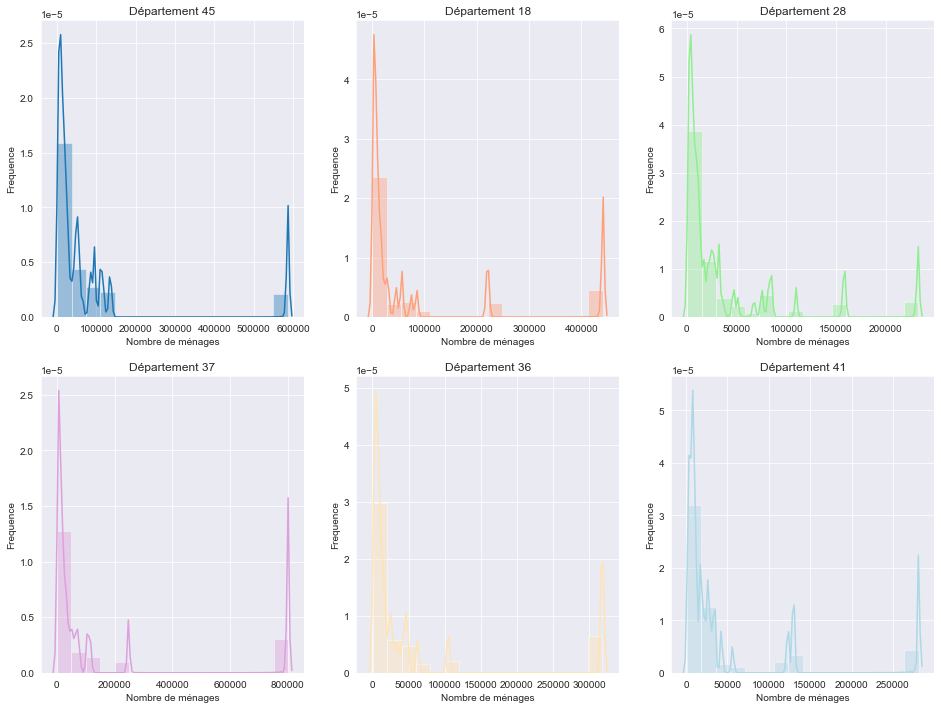

In [179]:
sns.set_style("darkgrid")

plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
plt.title("Département 45")
sns.distplot(dep_45['nb_men'], label='Departement 45',bins=16)
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")

plt.subplot(2,3,2)
plt.title("Département 18")
sns.distplot(dep_18['nb_men'], label='Departement 18',bins=16,color='lightsalmon')
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")

plt.subplot(2,3,3)
plt.title("Département 28")
sns.distplot(dep_28['nb_men'], label='Departement 28',bins=16,color='lightgreen')
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")

plt.subplot(2,3,4)
plt.title("Département 37")
sns.distplot(dep_37['nb_men'], label='Departement 37',bins=16,color='plum')
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")

plt.subplot(2,3,5)
plt.title("Département 36")
sns.distplot(dep_36['nb_men'], label='Departement 36',bins=16,color='moccasin')
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")


plt.subplot(2,3,6)
plt.title("Département 41")
sns.distplot(dep_41['nb_men'], label='Departement 41',bins=16,color='lightblue')
plt.xlabel("Nombre de ménages par ville")
plt.ylabel("Frequence")



#### b. Répartition des types de connexion selon les départements

##### Fibre


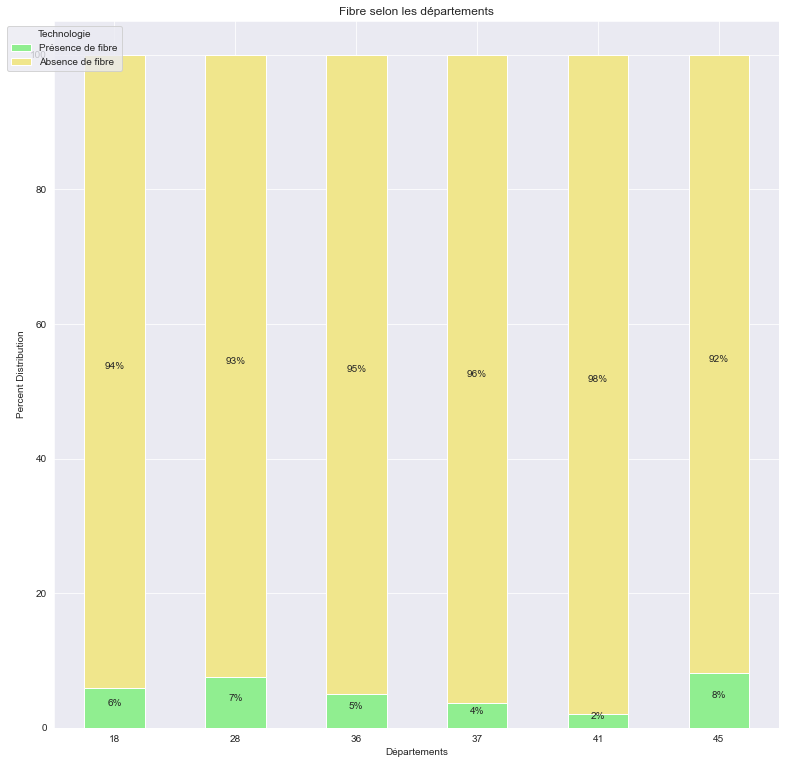

In [52]:
pal = ["lightgreen","khaki"]


ax= pd.crosstab(comm['DEP'], comm['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)

plt.title("Fibre selon les départements")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Départements")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

##### Code technologique

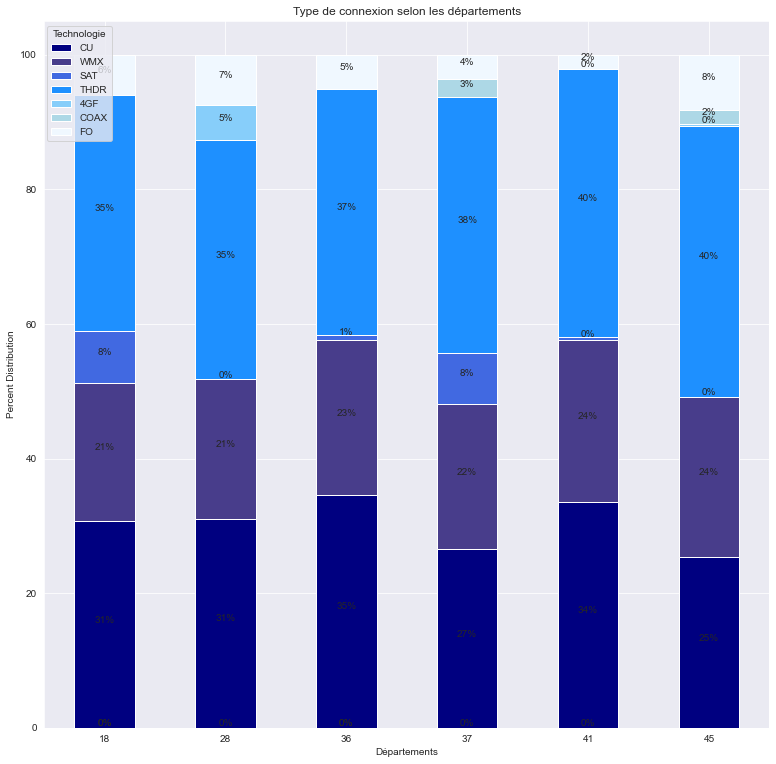

In [63]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(comm['DEP'], comm['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)

plt.title("Type de connexion selon les départements")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Départements")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

#### c. Répartition des types de connexion selon le type de ville de chaque département


##### Fibre - Département 18

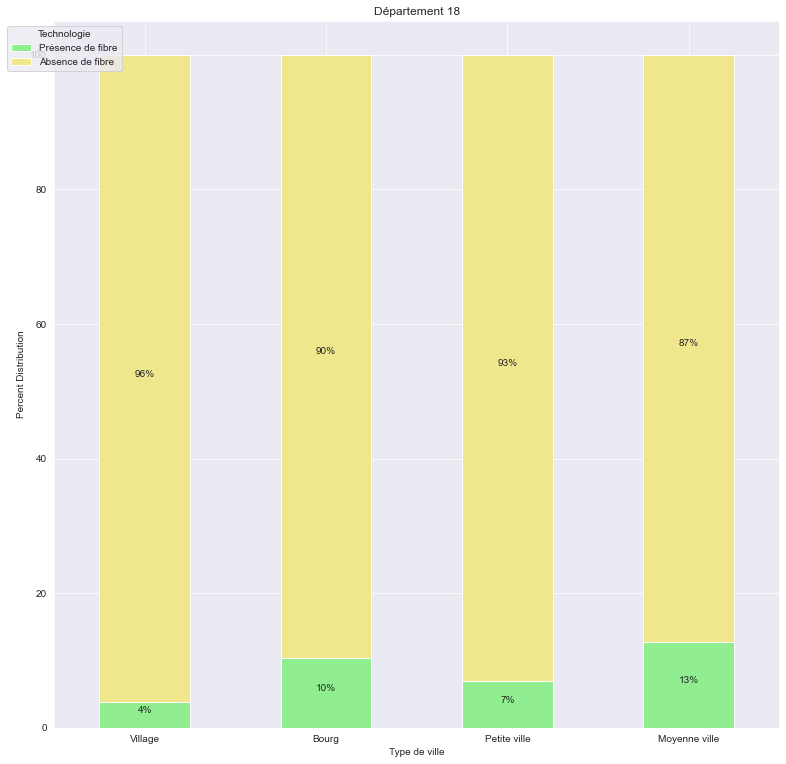

In [130]:
pal = ["lightgreen","khaki"]

ax= pd.crosstab(dep_18['catego_ville_qtit'], dep_18['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Moyenne ville"])
plt.title("Département 18")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Fibre - Département 28

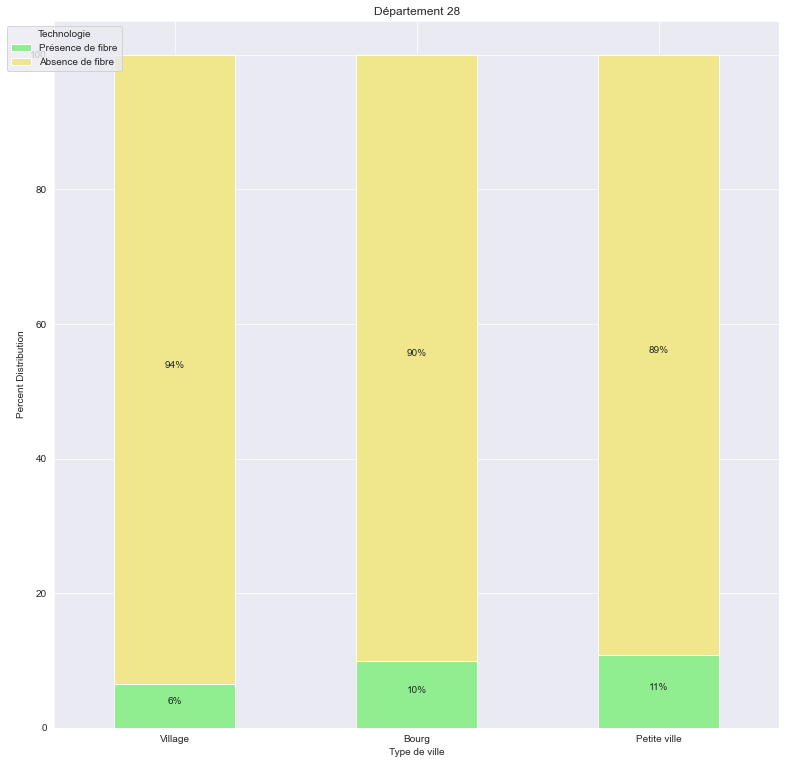

In [131]:
ax= pd.crosstab(dep_28['catego_ville_qtit'], dep_28['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville"])
plt.title("Département 28")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Fibre - Département 36

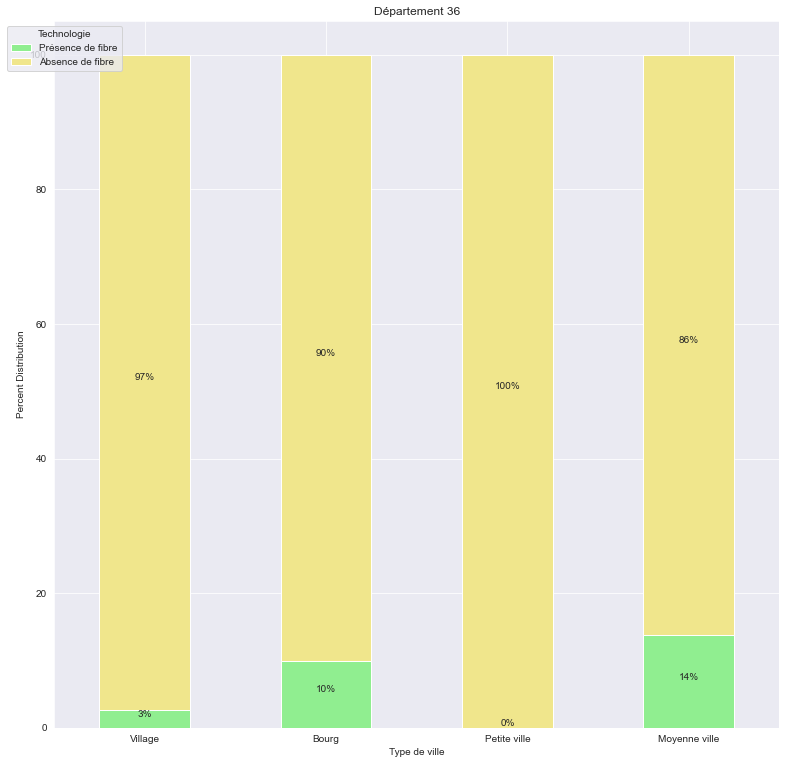

In [110]:
ax= pd.crosstab(dep_36['catego_ville_qtit'], dep_36['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Moyenne ville"])
plt.title("Département 36")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Fibre - Département 37

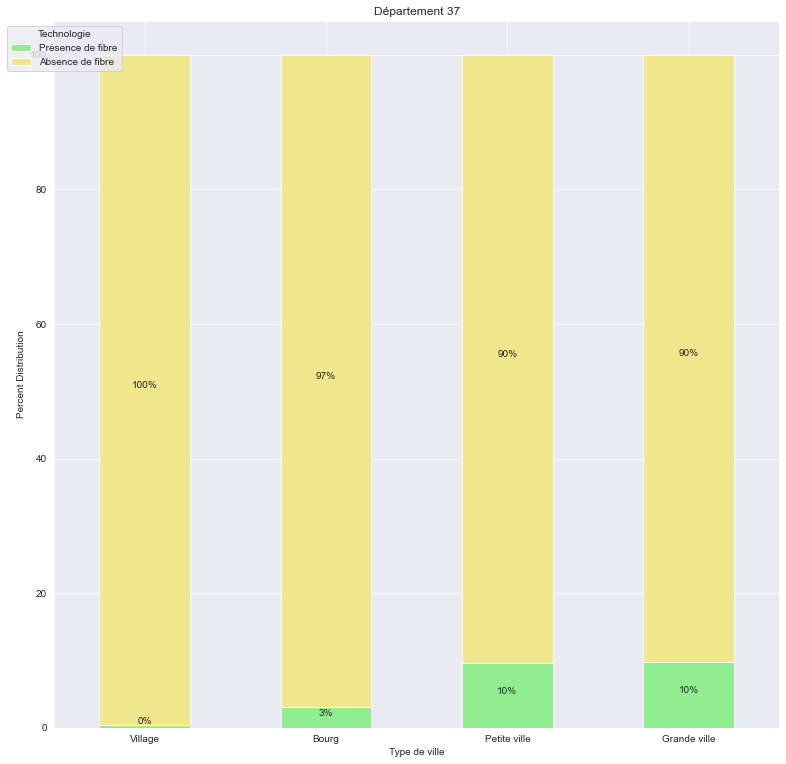

In [108]:
ax= pd.crosstab(dep_37['catego_ville_qtit'], dep_37['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 37")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Fibre - Département 41

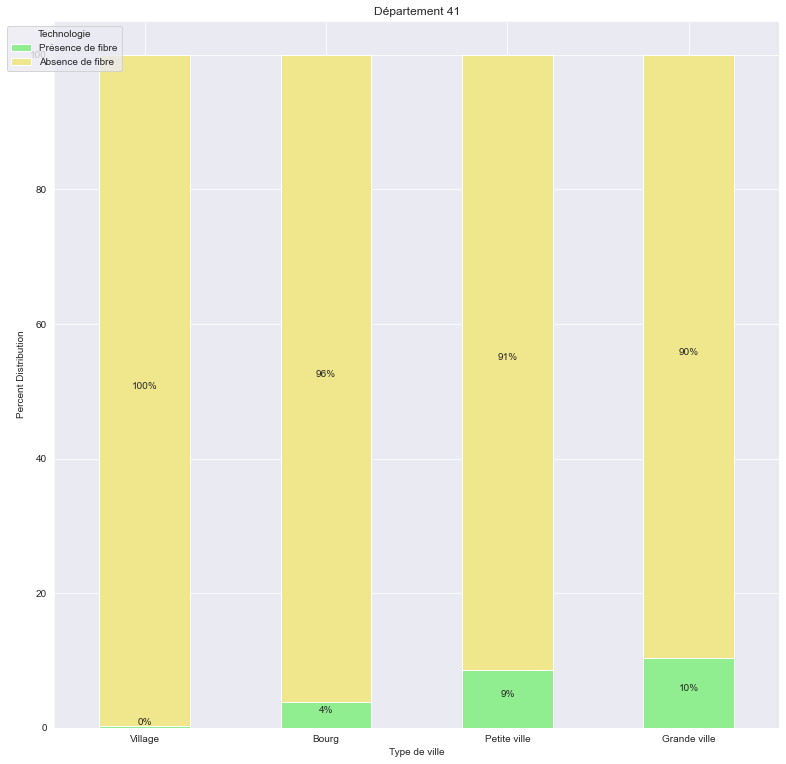

In [120]:
ax= pd.crosstab(dep_41['catego_ville_qtit'], dep_41['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 41")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Fibre - Département 45


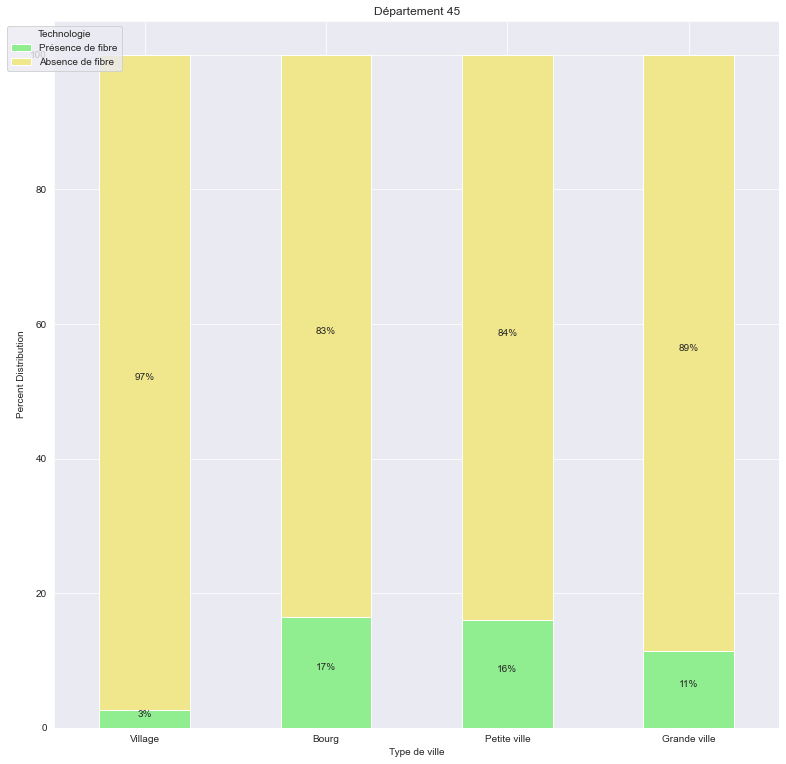

In [122]:
ax= pd.crosstab(dep_45['catego_ville_qtit'], dep_45['code_techno_fibre']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 45")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["Présence de fibre","Absence de fibre"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

##### Type de connexion - Département 18

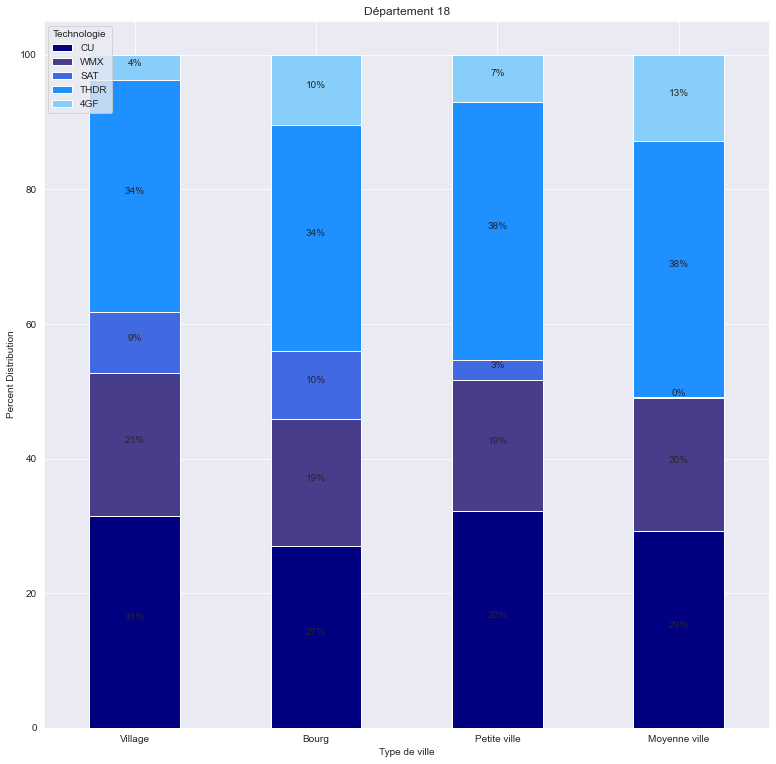

In [124]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_18['catego_ville_qtit'], dep_18['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Moyenne ville"])

plt.title("Département 18")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

##### Type de connexion - Département 28

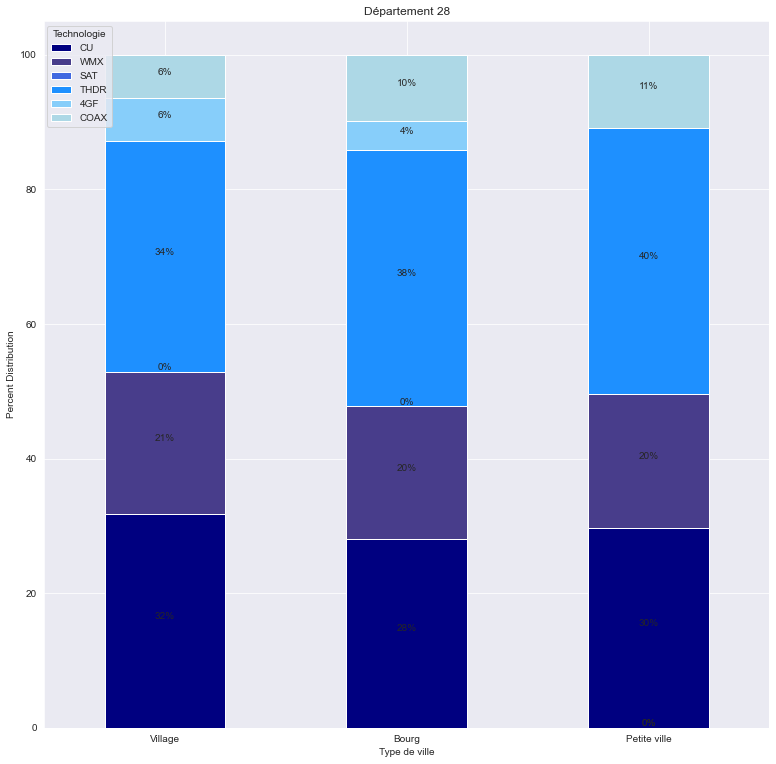

In [125]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_28['catego_ville_qtit'], dep_28['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville"])

plt.title("Département 28")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

##### Type de connexion - Département 36

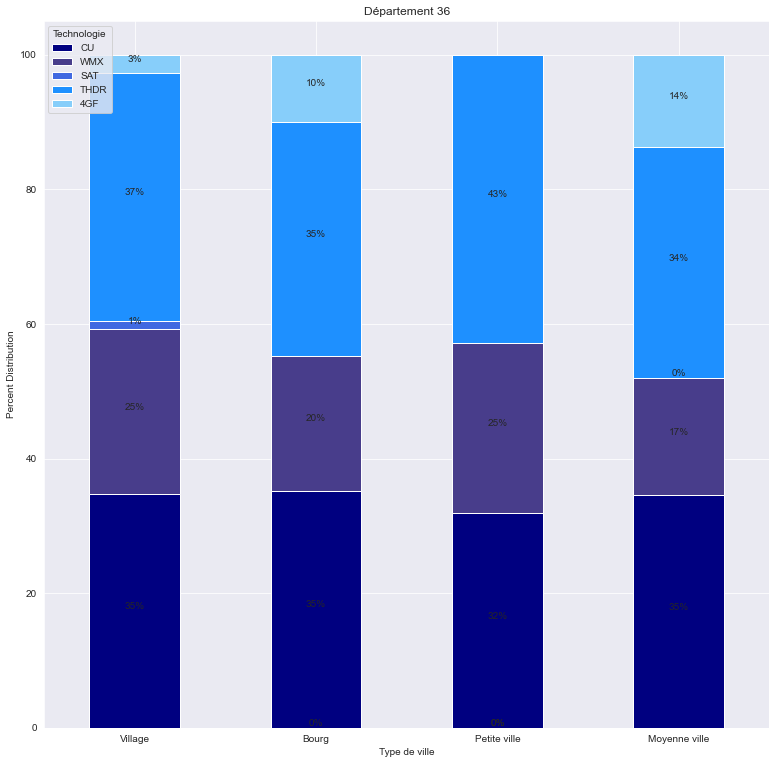

In [126]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_36['catego_ville_qtit'], dep_36['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Moyenne ville"])

plt.title("Département 36")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

##### Type de connexion - Département 37

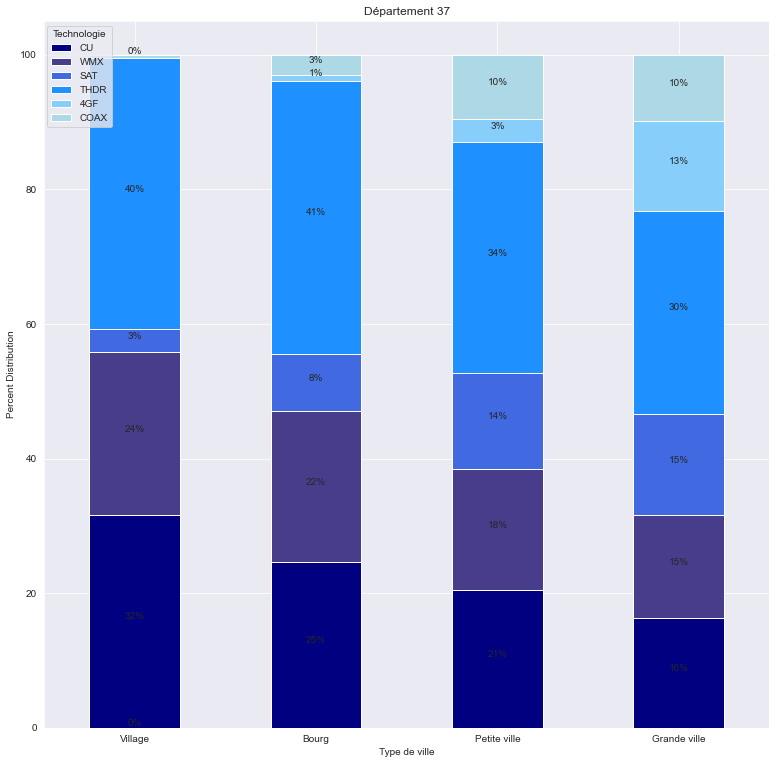

In [127]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_37['catego_ville_qtit'], dep_37['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 37")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

##### Type de connexion - Département 41

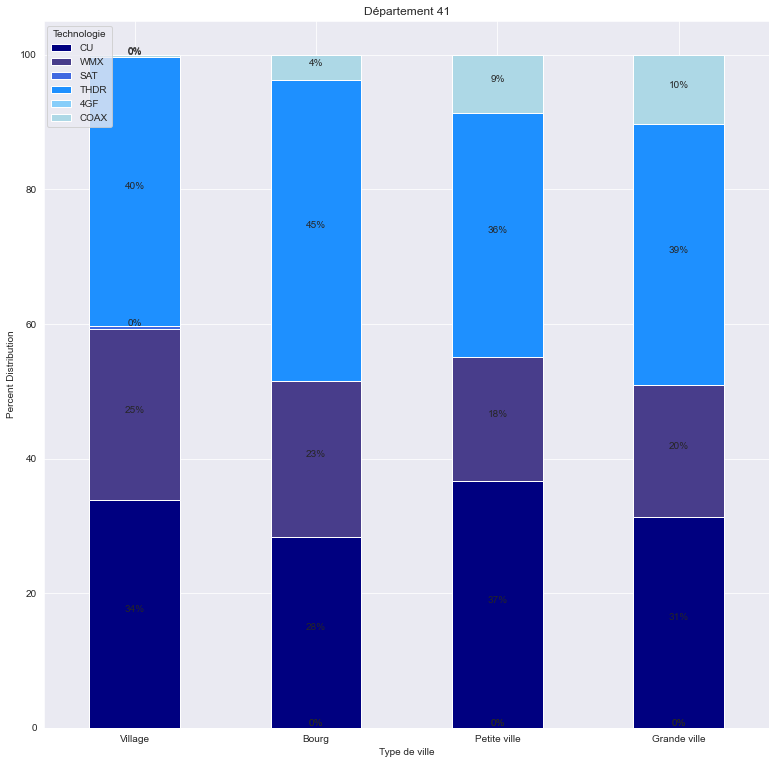

In [128]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_41['catego_ville_qtit'], dep_41['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 41")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()



##### Type de connexion - Département 45

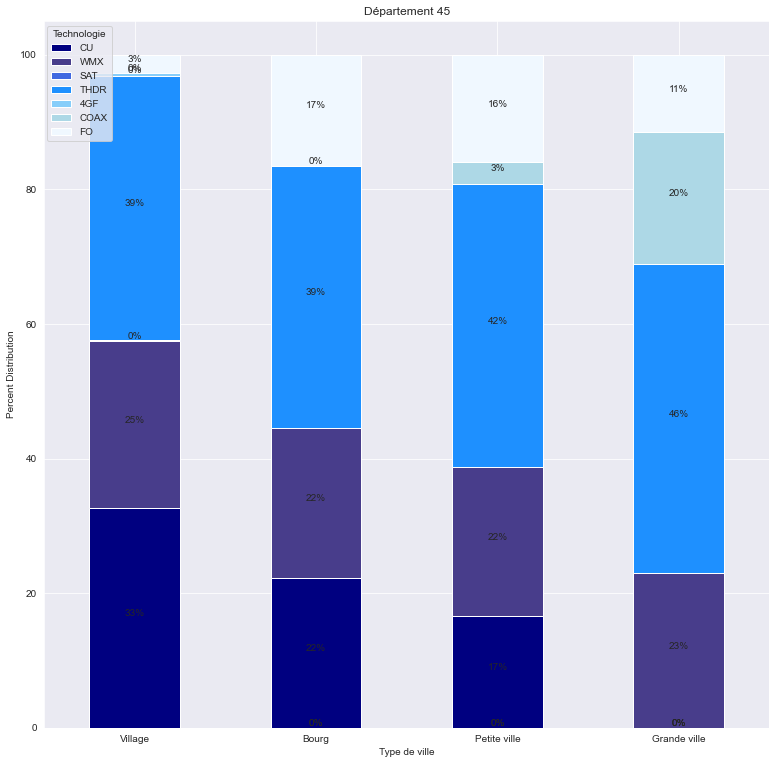

In [129]:
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(dep_45['catego_ville_qtit'], dep_45['code_techno_qtit']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Grande ville"])

plt.title("Département 45")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

#### c. Données socio-démographiques selon les départements

##### Catégories socio-professionnelles


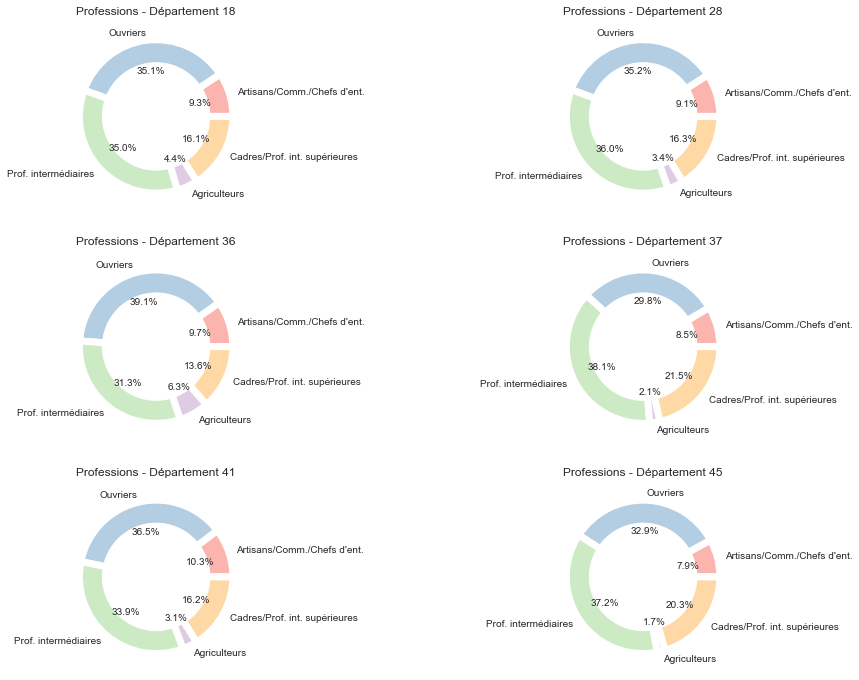

In [162]:
plt.figure(figsize=(16,12))

from palettable.colorbrewer.qualitative import Pastel1_7

plt.subplot(3,2,1)
plt.title('Professions - Département 18')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_18_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_18_ag['Ouvriers'].sum(),
         dep_18_ag['Prof..intermédiaires'].sum(),dep_18_ag['Agriculteurs.exploitants'].sum(),
         dep_18_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.subplot(3,2,2)
plt.title('Professions - Département 28')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_28_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_28_ag['Ouvriers'].sum(),
         dep_28_ag['Prof..intermédiaires'].sum(),dep_28_ag['Agriculteurs.exploitants'].sum(),
         dep_28_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,3)
plt.title('Professions - Département 36')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_36_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_36_ag['Ouvriers'].sum(),
         dep_36_ag['Prof..intermédiaires'].sum(),dep_36_ag['Agriculteurs.exploitants'].sum(),
         dep_36_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.subplot(3,2,4)
plt.title('Professions - Département 37')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_37_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_37_ag['Ouvriers'].sum(),
         dep_37_ag['Prof..intermédiaires'].sum(),dep_37_ag['Agriculteurs.exploitants'].sum(),
         dep_37_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,5)
plt.title('Professions - Département 41')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_41_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_41_ag['Ouvriers'].sum(),
         dep_41_ag['Prof..intermédiaires'].sum(),dep_41_ag['Agriculteurs.exploitants'].sum(),
         dep_41_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,6)
plt.title('Professions - Département 45')
labels1 = "Artisans/Comm./Chefs d'ent.", "Ouvriers", "Prof. intermédiaires","Agriculteurs","Cadres/Prof. int. supérieures"
sizes = [dep_45_ag['Artisans..Commerçants..Chefs.entreprise'].sum(), dep_45_ag['Ouvriers'].sum(),
         dep_45_ag['Prof..intermédiaires'].sum(),dep_45_ag['Agriculteurs.exploitants'].sum(),
         dep_45_ag['Cadres.Prof..intel..sup.'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


##### Niveaux d'études

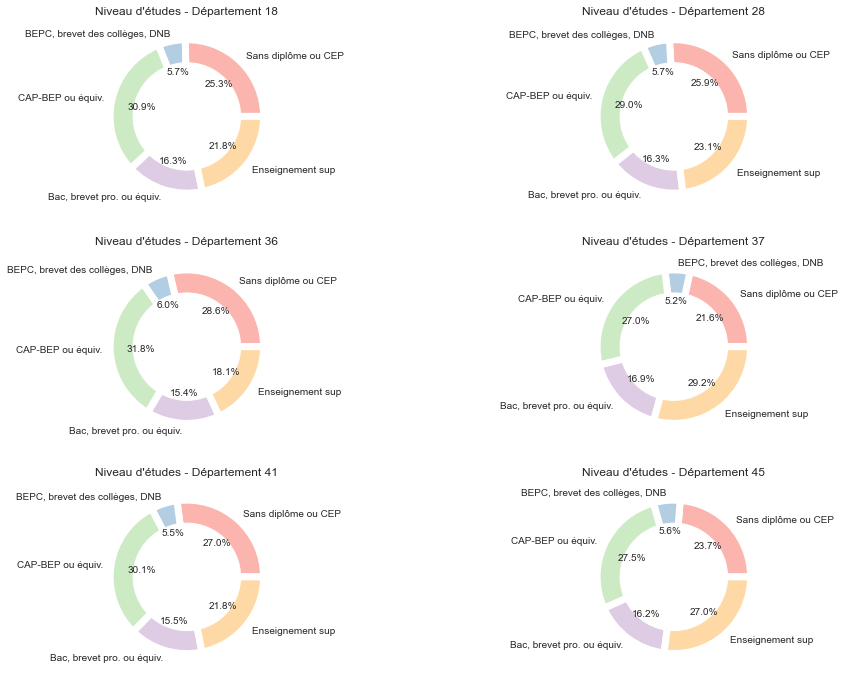

In [163]:


plt.figure(figsize=(16,12))

from palettable.colorbrewer.qualitative import Pastel1_7

plt.subplot(3,2,1)
plt.title("Niveau d'études - Département 18")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_18_ag['Sans diplôme ou CEP'].sum(), dep_18_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_18_ag['CAP-BEP ou équiv.'].sum(),dep_18_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_18_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.subplot(3,2,2)
plt.title("Niveau d'études - Département 28")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_28_ag['Sans diplôme ou CEP'].sum(), dep_28_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_28_ag['CAP-BEP ou équiv.'].sum(),dep_28_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_28_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,3)
plt.title("Niveau d'études - Département 36")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_36_ag['Sans diplôme ou CEP'].sum(), dep_36_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_36_ag['CAP-BEP ou équiv.'].sum(),dep_36_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_36_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.subplot(3,2,4)
plt.title("Niveau d'études - Département 37")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_37_ag['Sans diplôme ou CEP'].sum(), dep_37_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_37_ag['CAP-BEP ou équiv.'].sum(),dep_37_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_37_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,5)
plt.title("Niveau d'études - Département 41")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_41_ag['Sans diplôme ou CEP'].sum(), dep_41_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_41_ag['CAP-BEP ou équiv.'].sum(),dep_41_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_41_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(3,2,6)
plt.title("Niveau d'études - Département 45")
labels1 = "Sans diplôme ou CEP", "BEPC, brevet des collèges, DNB","CAP-BEP ou équiv.","Bac, brevet pro. ou équiv.","Enseignement sup"
sizes = [dep_45_ag['Sans diplôme ou CEP'].sum(), dep_45_ag['BEPC, brevet des collèges, DNB'].sum(),
         dep_45_ag['CAP-BEP ou équiv.'].sum(),dep_45_ag['Bac, brevet pro. ou équiv.'].sum(),
         dep_45_ag['Enseignement sup'].sum()]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

## II) Approche communale

### 1. Importation et nettoyage des données

Importation des fichiers csv et nettoyage des données

In [93]:
comm = pd.read_csv("C:/Users/meyss/Desktop/cvl_comm_agrege.csv",encoding='latin-1',sep=";",header=0)

In [94]:
comm = comm.drop(['Unnamed: 0','tx_pauvre'],axis=1)

comm = comm.dropna()

In [95]:
#########################Création de catégories de villes en fonction du nombre d'habitants

# moins de 2 000 habitants : village ;
# entre 2 000 et 5 000 habitants : bourg ; 
# entre 5 000 et 20 000 habitants : petite ville ; 
# entre 20 000 et 50 000 habitants : ville moyenne;
# entre 50 000 et 200 000 habitants : grande ville ; 
# au-delà :  métropole.


# Création d'une liste de conditions
conditions = [
    (  ((comm['nb_pers'] < 2000))   ),
    (  ((comm['nb_pers'] <5000) & (comm['nb_pers'] >= 2000))   ),
    (  ((comm['nb_pers'] <20000) & (comm['nb_pers'] >= 5000))   ),
    (  ((comm['nb_pers'] <50000) & (comm['nb_pers'] >= 20000))   ),
    (  ((comm['nb_pers'] <200000) & (comm['nb_pers'] >= 50000))   ),
    (  ((comm['nb_pers'] >= 200000))   )
        ]

# Création de listes de valeurs à assigner pour chaque condition
values = ["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville","Metropole"]
values2 = [1,2,3,4,5,6]


# Création de nouvelles colonnes et utilisation de np.select pour lui assigner des valeurs en utilisant nos listes comme arguments
comm['catego_ville_num'] = np.select(conditions, values2)

comm['catego_ville_cat'] = np.select(conditions, values)

In [96]:
comm.head

<bound method NDFrame.head of       REG  DEP    COM              LIBCOM  fibre  non_fibre   tx_fibre  \
0      24   18  18001             Achères      0       1564   0.000000   
1      24   18  18002      Ainay-le-Vieil      0        877   0.000000   
2      24   18  18003  Les Aix-d'Angillon   1025       6582  13.474431   
3      24   18  18004             Allogny      0       3654   0.000000   
4      24   18  18005             Allouis    299       2619  10.246744   
...   ...  ...    ...                 ...    ...        ...        ...   
1752   24   45  45344          Villorceau    439       2794  13.578719   
1753   24   45  45345              Vimory      7       3274   0.213350   
1754   24   45  45346     Vitry-aux-Loges      0       5727   0.000000   
1755   24   45  45347              Vrigny      0       2214   0.000000   
1756   24   45  45348      Yèvre-la-Ville      0       2276   0.000000   

      tx_non_fibre      P15_RP  P15_RSECOCC  ...  Agriculteurs.exploitants  \
0  

### 2. Visualisation des données

#### a. Répartition de la population selon les départements


Text(0.5, 1.0, 'Nombre de ménages selon le type de ville')

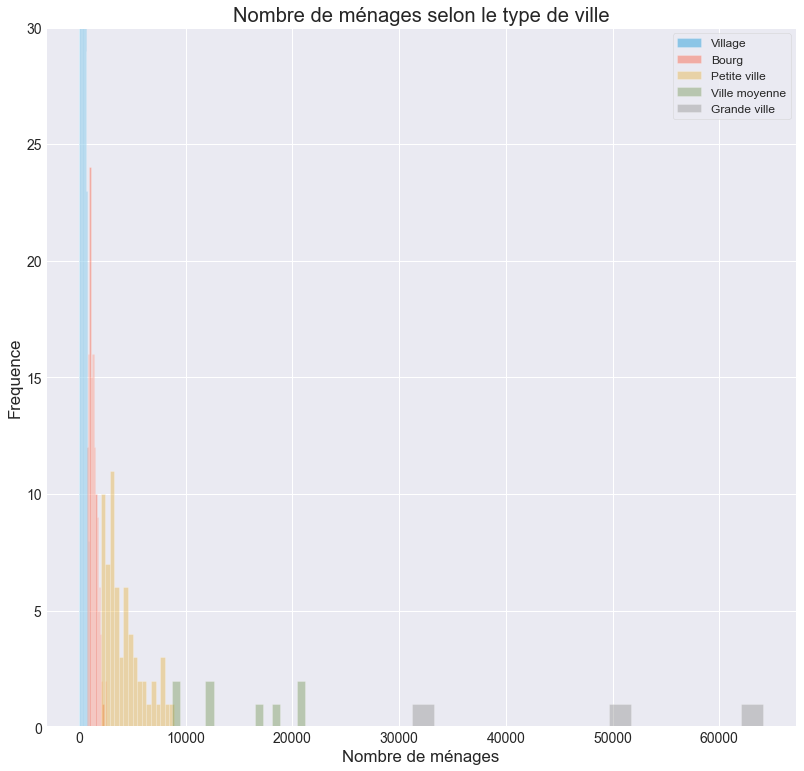

In [73]:
plt.figure(figsize=(12,12))

df = comm[comm.catego_ville_cat == 'Village']
sns.distplot(df['nb_men'],  kde=False, label='Village',bins=16)
df = comm[comm.catego_ville_cat == 'Bourg']
sns.distplot(df['nb_men'],  kde=False, label='Bourg',bins=16)
df = comm[comm.catego_ville_cat == 'Petite ville']
sns.distplot(df['nb_men'],  kde=False, label='Petite ville',bins=16)
df = comm[comm.catego_ville_cat == "Ville moyenne"]
sns.distplot(df['nb_men'],  kde=False, label="Ville moyenne",bins=16)
df = comm[comm.catego_ville_cat == "Grande ville"]
sns.distplot(df['nb_men'],  kde=False, label="Grande ville",bins=16)


axes = plt.gca()
axes.set_ylim(0,30)
plt.legend(prop={'size': 12})
plt.xlabel("Nombre de ménages")
plt.ylabel("Frequence")


plt.title("Nombre de ménages selon le type de ville")

#### b. Répartition de la fibre selon les types de ville


In [74]:
fibre = comm.groupby('catego_ville_cat')['fibre'].sum()
non_fibre = comm.groupby('catego_ville_cat')['non_fibre'].sum()

In [75]:
fibre

catego_ville_cat
Bourg             60722
Grande ville      47412
Petite ville     134450
Village           60269
Ville moyenne     48029
Name: fibre, dtype: int64

In [76]:
non_fibre

catego_ville_cat
Bourg            1157568
Grande ville      380512
Petite ville     1110318
Village          2904976
Ville moyenne     389717
Name: non_fibre, dtype: int64

([<matplotlib.patches.Wedge at 0x1e120be5910>,
 [Text(1.0340345588533693, 0.37519665656415163, 'Fibre'),
  Text(-1.0340345676354807, -0.37519663236082584, 'Pas de fibre')],
 [Text(0.564018850283656, 0.2046527217622645, '11.1%'),
  Text(-0.5640188550738985, -0.20465270856045042, '88.9%')])

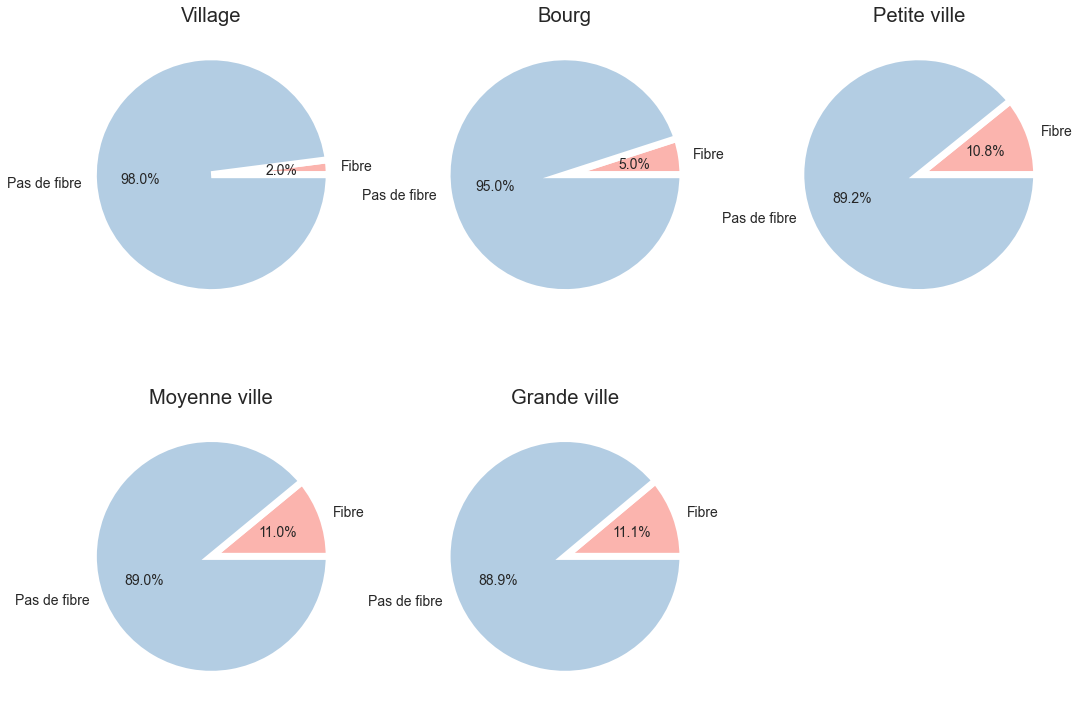

In [77]:
from palettable.colorbrewer.qualitative import Pastel1_7

plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
plt.title("Village")


labels1 =  "Fibre","Pas de fibre"
sizes = [fibre[3], non_fibre[3]]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

#my_circle=plt.Circle( (0,0), 0.7, color='white')
#p=plt.gcf()
#p.gca().add_artist(my_circle)

plt.subplot(2,3,2)

plt.title("Bourg")


labels1 = "Fibre","Pas de fibre"
sizes = [fibre[0], non_fibre[0]]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })



plt.subplot(2,3,3)
plt.title("Petite ville")


labels1 = "Fibre","Pas de fibre"
sizes = [fibre[2], non_fibre[2]]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })



plt.subplot(2,3,4)
plt.title("Moyenne ville")


labels1 = "Fibre","Pas de fibre"
sizes = [fibre[4], non_fibre[4]]
explode = (0, 0.1, 0, 0)  

plt.pie(sizes,  autopct='%1.1f%%',labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })


plt.subplot(2,3,5)
plt.title("Grande ville")


labels1 = "Fibre","Pas de fibre"
sizes = [fibre[1], non_fibre[1]]
explode = (0, 0.1, 0, 0)  
plt.pie(sizes, autopct='%1.1f%%', labels=labels1,colors=Pastel1_7.hex_colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })


#### b. Données socio-démographiques selon les types de ville

##### Répartition des âges 

Text(0.5, 0, '')

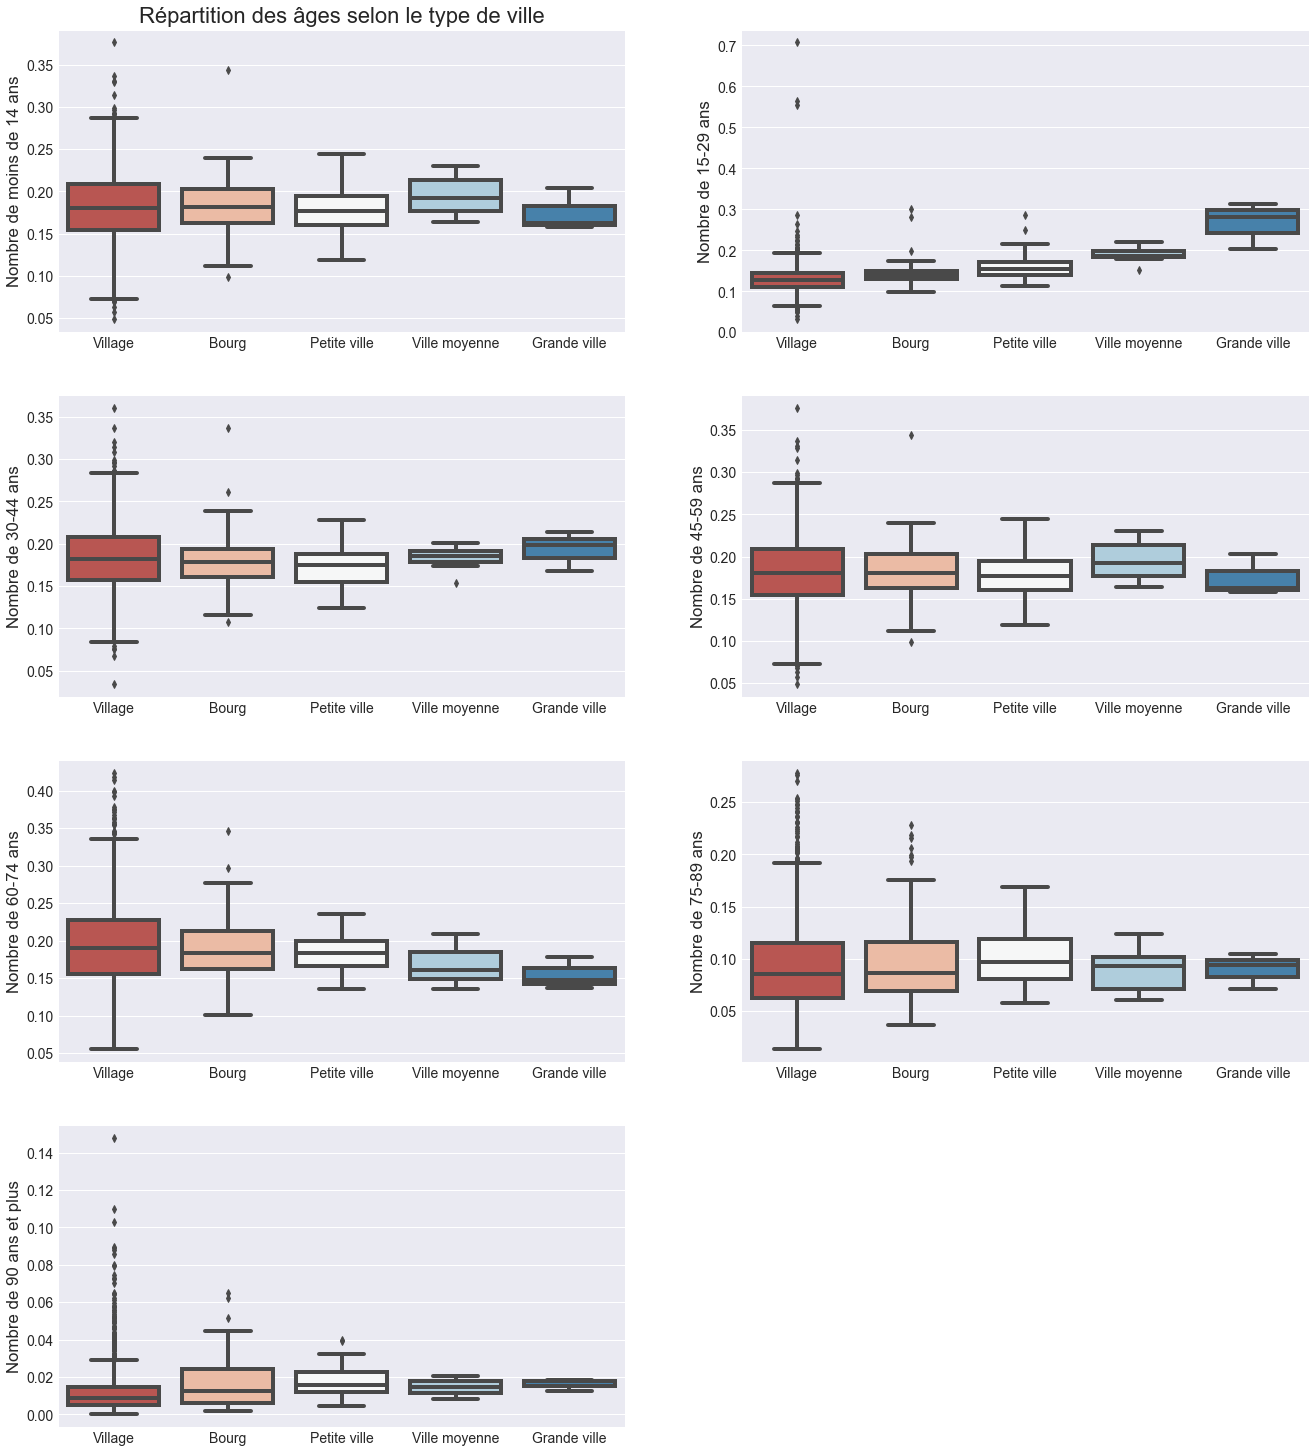

In [78]:
sns.set_style("darkgrid")

plt.figure(figsize=(20,24))

    
plt.subplot(4,2,1)
plt.title('Répartition des âges selon le type de ville', fontsize=22)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X0.14_ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de moins de 14 ans')
plt.xlabel('')


plt.subplot(4,2,2)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X15.29.ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 15-29 ans')
plt.xlabel('')

plt.subplot(4,2,3)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X30.44.ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 30-44 ans')
plt.xlabel('')

plt.subplot(4,2,4)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X45.59.ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 45-59 ans')
plt.xlabel('')


plt.subplot(4,2,5)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X60.74.ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 60-74 ans')
plt.xlabel('')


plt.subplot(4,2,6)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X75.89.ans']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 75-89 ans')
plt.xlabel('')


plt.subplot(4,2,7)
sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['X90.ans.ou.plus']/comm['nb_pers'], data=comm,palette='RdBu')
plt.ylabel('Nombre de 90 ans et plus')
plt.xlabel('')

##### Répartition des CSP 

[None, None, None, None, None, None, None, None, None, None]

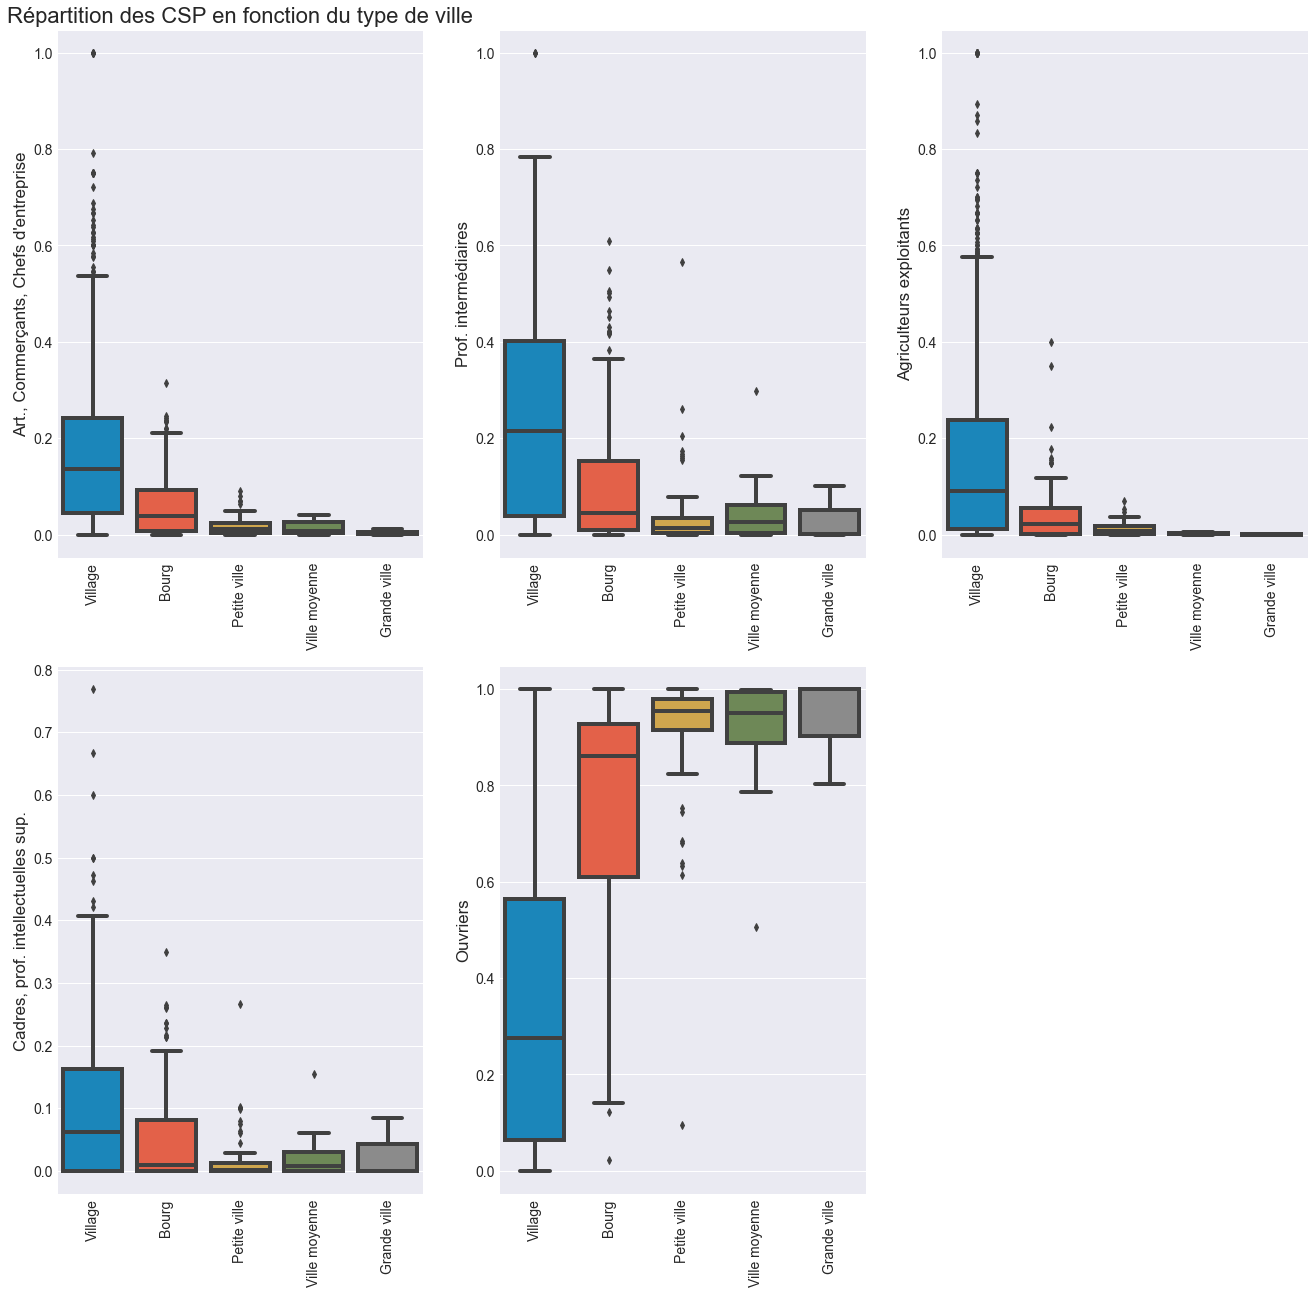

In [92]:
plt.figure(figsize=(20,20))


    
plt.subplot(2,3,1)
plt.title('Répartition des CSP en fonction du type de ville', fontsize=22)
g = sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Artisans..Commerçants..Chefs.entreprise']/(comm['Artisans..Commerçants..Chefs.entreprise']+comm['Prof..intermédiaires']+comm['Agriculteurs.exploitants']+comm['Cadres.Prof..intel..sup.']+comm['Ouvriers']), data=comm)
plt.ylabel("Art., Commerçants, Chefs d'entreprise")
plt.xlabel('')
plt.setp(g.get_xticklabels(), rotation=90)

plt.subplot(2,3,2)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Prof..intermédiaires']/(comm['Artisans..Commerçants..Chefs.entreprise']+comm['Prof..intermédiaires']+comm['Agriculteurs.exploitants']+comm['Cadres.Prof..intel..sup.']+comm['Ouvriers']), data=comm)
plt.ylabel('Prof. intermédiaires')
plt.xlabel('')
plt.setp(g.get_xticklabels(), rotation=90)

plt.subplot(2,3,3)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Agriculteurs.exploitants']/(comm['Artisans..Commerçants..Chefs.entreprise']+comm['Prof..intermédiaires']+comm['Agriculteurs.exploitants']+comm['Cadres.Prof..intel..sup.']+comm['Ouvriers']), data=comm)
plt.setp(g.get_xticklabels(), rotation=90)
plt.ylabel('Agriculteurs exploitants')
plt.xlabel('')

plt.subplot(2,3,4)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Cadres.Prof..intel..sup.']/(comm['Artisans..Commerçants..Chefs.entreprise']+comm['Prof..intermédiaires']+comm['Agriculteurs.exploitants']+comm['Cadres.Prof..intel..sup.']+comm['Ouvriers']), data=comm)
plt.ylabel('Cadres, prof. intellectuelles sup.')
plt.xlabel('')
plt.setp(g.get_xticklabels(), rotation=90)

plt.subplot(2,3,5)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Ouvriers']/(comm['Artisans..Commerçants..Chefs.entreprise']+comm['Prof..intermédiaires']+comm['Agriculteurs.exploitants']+comm['Cadres.Prof..intel..sup.']+comm['Ouvriers']), data=comm)
plt.ylabel('Ouvriers')
plt.xlabel('')
plt.setp(g.get_xticklabels(), rotation=90)

##### Répartition des niveaux d'étude 

Text(0.5, 0, '')

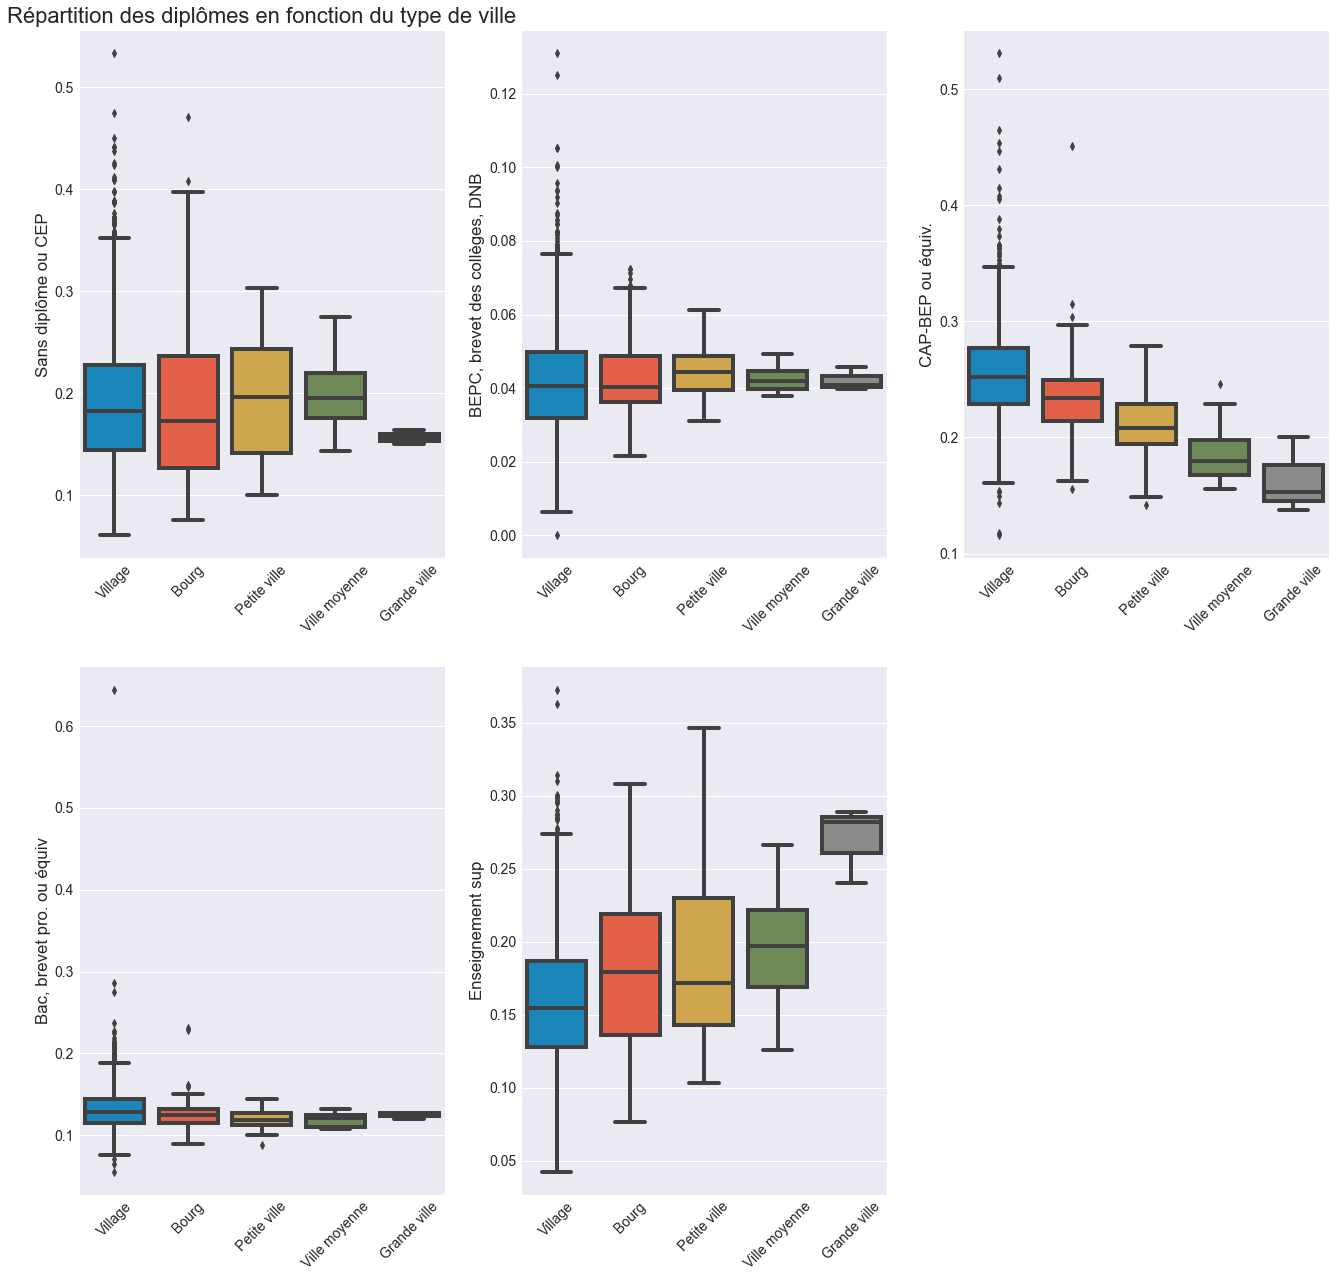

In [91]:

plt.figure(figsize=(20,20))


    
plt.subplot(2,3,1)
plt.title('Répartition des diplômes en fonction du type de ville', fontsize=22)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Sans diplôme ou CEP']/comm['nb_pers'], data=comm)
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel("Sans diplôme ou CEP")
plt.xlabel('')


plt.subplot(2,3,2)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['BEPC, brevet des collèges, DNB']/comm['nb_pers'], data=comm)
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('BEPC, brevet des collèges, DNB')
plt.xlabel('')

plt.subplot(2,3,3)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['CAP-BEP ou équiv.']/comm['nb_pers'], data=comm)
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('CAP-BEP ou équiv.')
plt.xlabel('')

plt.subplot(2,3,4)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Bac, brevet pro. ou équiv.']/comm['nb_pers'], data=comm)
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('Bac, brevet pro. ou équiv')
plt.xlabel('')

        
plt.subplot(2,3,5)
g=sns.boxplot(x='catego_ville_cat',order=["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville"],y=comm['Enseignement sup']/comm['nb_pers'], data=comm)
plt.setp(g.get_xticklabels(), rotation=45)
plt.ylabel('Enseignement sup')
plt.xlabel('')

## III) Approche infra-communale

### 1. Importation et nettoyage des données

Importation des librairies et fichiers csv ; Préparation et nettoyage des données

In [116]:
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


iris = pd.read_csv("C:/Users/meyss/Desktop/cvl_iris.csv",encoding='latin-1',sep=",",header=0)

C:\Users\meyss\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [117]:
# calculer nb d'habitants

iris['nb_pers'] = iris['X0.14_ans'] + iris['X15.29.ans']+ iris['X30.44.ans']+ iris['X45.59.ans']+ iris['X60.74.ans']+ iris['X75.89.ans']+ iris['X90.ans.ou.plus']


In [99]:
#variable relative à la fibre : catégorielle -> ordinale

### fibre =1; non fibre=0

iris['code_techno'] = np.where(iris['code_techno'] == 'Non Fibre', 0, 1)


In [101]:
######################### Création de catégories de villes en fonction du nombre d'habitants

# moins de 2 000 habitants : village ;
# entre 2 000 et 5 000 habitants : bourg ; 
# entre 5 000 et 20 000 habitants : petite ville ; 
# entre 20 000 et 50 000 habitants : ville moyenne;
# entre 50 000 et 200 000 habitants : grande ville ; 
# au-delà :  métropole.


# Création d'une liste de conditions
conditions = [
    (  ((iris['nb_pers'] < 2000))   ),
    (  ((iris['nb_pers'] <5000) & (iris['nb_pers'] >= 2000))   ),
    (  ((iris['nb_pers'] <20000) & (iris['nb_pers'] >= 5000))   ),
    (  ((iris['nb_pers'] <50000) & (iris['nb_pers'] >= 20000))   ),
    (  ((iris['nb_pers'] <200000) & (iris['nb_pers'] >= 50000))   ),
    (  ((iris['nb_pers'] >= 200000))   )
        ]

# Création de listes de valeurs à assigner pour chaque condition
values = ["Village", "Bourg", "Petite ville","Ville moyenne","Grande ville","Metropole"]
values2 = [1,2,3,4,5,6]


# Création de nouvelles colonnes et utilisation de np.select pour lui assigner des valeurs en utilisant nos listes comme arguments

iris['catego_ville_cat'] = np.select(conditions, values)
iris['catego_ville_qtit'] = np.select(conditions, values2)

In [110]:
iris

,imb_id,REG,DEP,COM,LIBCOM,CODE_IRIS,IRIS,NOM_IRIS,TRIRIS,code_techno,...,Agriculteurs.exploitants,Cadres.Prof..intel..sup.,"Bac, brevet pro. ou équiv.","BEPC, brevet des collèges, DNB",CAP-BEP ou équiv.,Enseignement sup,Sans diplôme ou CEP,nb_pers,catego_ville_cat,catego_ville_qtit
48.0,24,45,45234,Orléans,452341702,1702,Sud-Ouest-Chabassières,450291,COAX,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
48.0,24,45,45234,Orléans,452341702,1702,Sud-Ouest-Chabassières,450291,CU,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
48.0,24,45,45234,Orléans,452341702,1702,Sud-Ouest-Chabassières,450291,FO,1,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
48.0,24,45,45234,Orléans,452341702,1702,Sud-Ouest-Chabassières,450291,SAT,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
48.0,24,45,45234,Orléans,452341702,1702,Sud-Ouest-Chabassières,450291,SAT,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24773896.0,24,45,45234,Orléans,452341301,1301,Fiacre-Chenault,450281,SAT,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
24773896.0,24,45,45234,Orléans,452341301,1301,Fiacre-Chenault,450281,SAT,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
24773897.0,24,45,45234,Orléans,452340701,701,Ouest-Gendarmerie,450221,CU,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5
24773897.0,24,45,45234,Orléans,452340701,701,Ouest-Gendarmerie,450221,SAT,0,...,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0,Grande ville,5


In [115]:
pd.crosstab(iris['catego_ville_cat'],"freq")

col_0,freq
catego_ville_cat,
0,469
Bourg,1204873
Grande ville,427716
Petite ville,1202324
Village,3011324
Ville moyenne,465651


In [108]:
iris[iris['catego_ville_cat'].isin(['0'])]

,imb_id,REG,DEP,COM,LIBCOM,CODE_IRIS,IRIS,NOM_IRIS,TRIRIS,code_techno,...,Agriculteurs.exploitants,Cadres.Prof..intel..sup.,"Bac, brevet pro. ou équiv.","BEPC, brevet des collèges, DNB",CAP-BEP ou équiv.,Enseignement sup,Sans diplôme ou CEP,nb_pers,catego_ville_cat,catego_ville_qtit
68239.0,11,78,78444,Neauphlette,784440000,0,Neauphlette,ZZZZZZ,4GF,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
68239.0,11,78,78444,Neauphlette,784440000,0,Neauphlette,ZZZZZZ,4GF,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
68239.0,11,78,78444,Neauphlette,784440000,0,Neauphlette,ZZZZZZ,CU,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
68239.0,11,78,78444,Neauphlette,784440000,0,Neauphlette,ZZZZZZ,FO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
68239.0,11,78,78444,Neauphlette,784440000,0,Neauphlette,ZZZZZZ,SAT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23194646.0,27,58,58193,Neuvy-sur-Loire,581930000,0,Neuvy-sur-Loire,ZZZZZZ,4GF,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
23194646.0,27,58,58193,Neuvy-sur-Loire,581930000,0,Neuvy-sur-Loire,ZZZZZZ,CU,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
23194646.0,27,58,58193,Neuvy-sur-Loire,581930000,0,Neuvy-sur-Loire,ZZZZZZ,SAT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
23194646.0,27,58,58193,Neuvy-sur-Loire,581930000,0,Neuvy-sur-Loire,ZZZZZZ,SAT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [111]:
iris=iris[["catego_ville_cat","catego_ville_qtit","TRIRIS"]]
iris = iris.dropna()

In [114]:
iris.isna().sum()

catego_ville_cat     0
catego_ville_qtit    0
TRIRIS               0
dtype: int64

In [102]:
iris_village = iris[iris['catego_ville_cat'].isin(["Village"])]
iris_bourg = iris[iris['catego_ville_cat'].isin(["Bourg"])]
iris_petit = iris[iris['catego_ville_cat'].isin(["Petite ville"])]
iris_moyen = iris[iris['catego_ville_cat'].isin(["Ville moyenne"])]
iris_grand = iris[iris['catego_ville_cat'].isin(["Grande ville"])]

<Figure size 1440x1728 with 0 Axes>

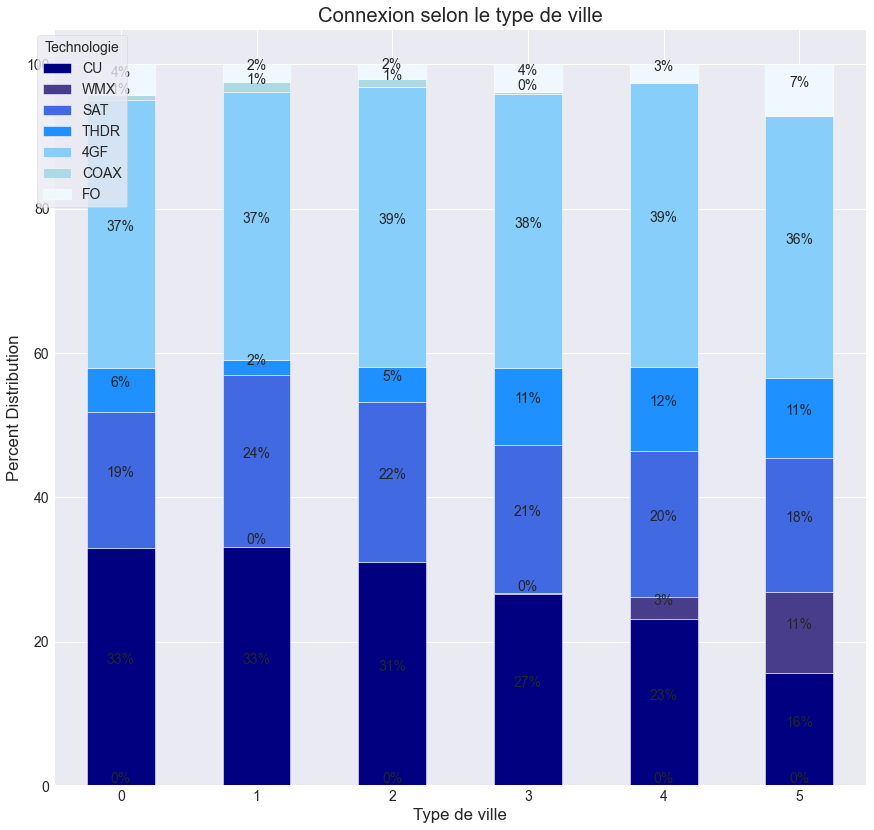

In [112]:
sns.set_style("darkgrid")

plt.figure(figsize=(20,24))

    
pal = ["Navy","DarkSlateBlue","royalblue", "dodgerblue", "lightskyblue", "lightblue","aliceblue"]

ax= pd.crosstab(iris['catego_ville_qtit'], iris['TRIRIS']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(13,13),stacked=True, rot=0, color=pal)
#ax_1.xaxis.set_ticklabels(["Village", "Bourg", "Petite ville","Moyenne ville","Grande ville","Monopole"])

plt.title("Connexion selon le type de ville")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Technologie",labels=["CU","WMX","SAT","THDR","4GF","COAX","FO"])

plt.xlabel("Type de ville")
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [33]:
x = iris[['DEP', 'COM', 'LIBCOM', 'CODE_IRIS', 'IRIS','NOM_IRIS','code_techno','X0.14_ans', 'X15.29.ans', 'X30.44.ans', 'X45.59.ans',
       'X60.74.ans', 'X75.89.ans', 'X90.ans.ou.plus','Ouvriers', 'Artisans..Commercants..Chefs.entreprise',
       'Prof..intermeiaires', 'Agriculteurs.exploitants',
       'Cadres.Prof..intel..sup.', 'Bac, brevet pro. ou équiv.',
       'BEPC, brevet des collèges, DNB', 'CAP-BEP ou équiv.',
       'Enseignement sup', 'Sans diplôme ou CEP','nb_pers']]

In [34]:
o = x.groupby('IRIS')['code_techno'].mean()

In [36]:
x = x.set_index('IRIS')

In [38]:
x['code_techno'] = o

In [42]:
x=x.drop_duplicates()
x = x.dropna()

In [43]:
x

,DEP,COM,LIBCOM,CODE_IRIS,NOM_IRIS,code_techno,X0.14_ans,X15.29.ans,X30.44.ans,X45.59.ans,...,Artisans..Commercants..Chefs.entreprise,Prof..intermeiaires,Agriculteurs.exploitants,Cadres.Prof..intel..sup.,"Bac, brevet pro. ou équiv.","BEPC, brevet des collèges, DNB",CAP-BEP ou équiv.,Enseignement sup,Sans diplôme ou CEP,nb_pers
IRIS,,,,,,,,,,,,,,,,,,,,,
Sud-Ouest-Chabassières,45234,Orléans,452341702,1702,450291,0.153431,21616.0,29954.0,22737.0,21616.0,...,117.0,1026.0,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0
Carmes-République,45234,Orléans,452340301,301,450211,0.133214,21616.0,29954.0,22737.0,21616.0,...,117.0,1026.0,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0
Le Lac-Avenue de l'Hôpital,45234,Orléans,452342102,2102,450311,0.172083,21616.0,29954.0,22737.0,21616.0,...,117.0,1026.0,10.0,866.0,12731.0,4326.0,14607.0,30726.0,16527.0,119336.0
Arçay,18008,Arçay,180080000,0,ZZZZZZ,0.000000,107.0,81.0,98.0,107.0,...,15.0,6.0,10.0,5.0,76.0,18.0,118.0,108.0,44.0,494.0
Turly,18033,Bourges,180330501,501,180081,0.131031,9845.0,12646.0,10519.0,9845.0,...,0.0,0.0,0.0,0.0,7908.0,2865.0,12522.0,15014.0,10231.0,61669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint-Médard,36203,Saint-Médard,362030000,0,ZZZZZZ,0.000000,4.0,4.0,9.0,4.0,...,0.0,30.0,5.0,5.0,5.0,2.0,10.0,6.0,19.0,41.0
La Buxerette,36028,La Buxerette,360280000,0,ZZZZZZ,0.000000,9.0,13.0,12.0,9.0,...,0.0,0.0,10.0,0.0,18.0,2.0,29.0,9.0,39.0,95.0
Reboursin,36170,Reboursin,361700000,0,ZZZZZZ,0.000000,14.0,24.0,11.0,14.0,...,70.0,99.0,20.0,30.0,13.0,6.0,25.0,14.0,28.0,94.0


### 2. Clustering

Idée de déterminer des classes d'iris différentes à l'aide de l'algorithme des k-means

In [44]:
X=x[['code_techno', 'X0.14_ans', 'X15.29.ans', 'X30.44.ans', 'X45.59.ans',
       'X60.74.ans', 'X75.89.ans', 'X90.ans.ou.plus', 'Ouvriers',
       'Artisans..Commercants..Chefs.entreprise', 'Prof..intermeiaires',
       'Agriculteurs.exploitants', 'Cadres.Prof..intel..sup.',
       'Bac, brevet pro. ou équiv.', 'BEPC, brevet des collèges, DNB',
       'CAP-BEP ou équiv.', 'Enseignement sup', 'Sans diplôme ou CEP',
       'nb_pers']]

In [45]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [46]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }


sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

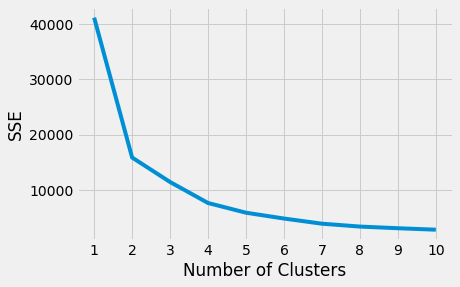

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
#Cluster K-means
model=KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42)

#adapter le modèle de données
model.fit(scaled_features)

print(model.labels_)

[1 1 1 ... 0 0 0]


In [49]:
x['classe'] = model.labels_

In [50]:
pd.crosstab(x['classe'],'freq')

col_0,freq
classe,
0,1868
1,102
2,190
3,5


### 3. Visualisation des types d'iris déterminés par le clustering

##### Nombre d'habitants par type d'iris

Text(0, 0.5, "Nb d'habitants")

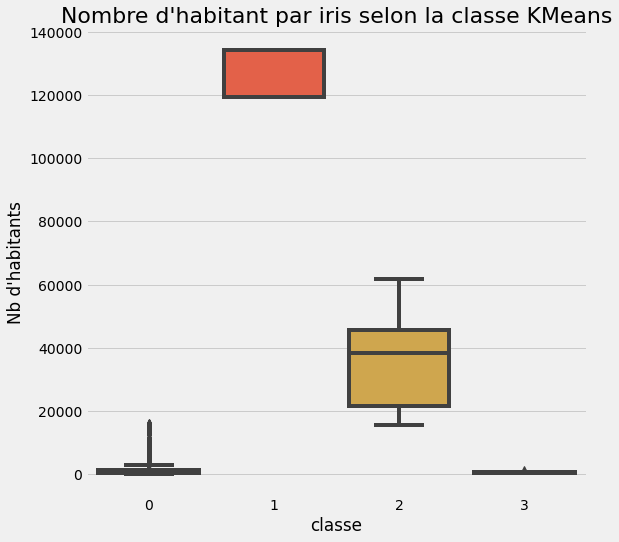

In [51]:
plt.figure(figsize=(8,8))
plt.title("Nombre d'habitant par iris selon la classe KMeans",fontsize=22)
sns.boxplot(x='classe',y='nb_pers', data=x)
plt.ylabel("Nb d'habitants")

##### Répartition des âges

Text(0.5, 0, '')

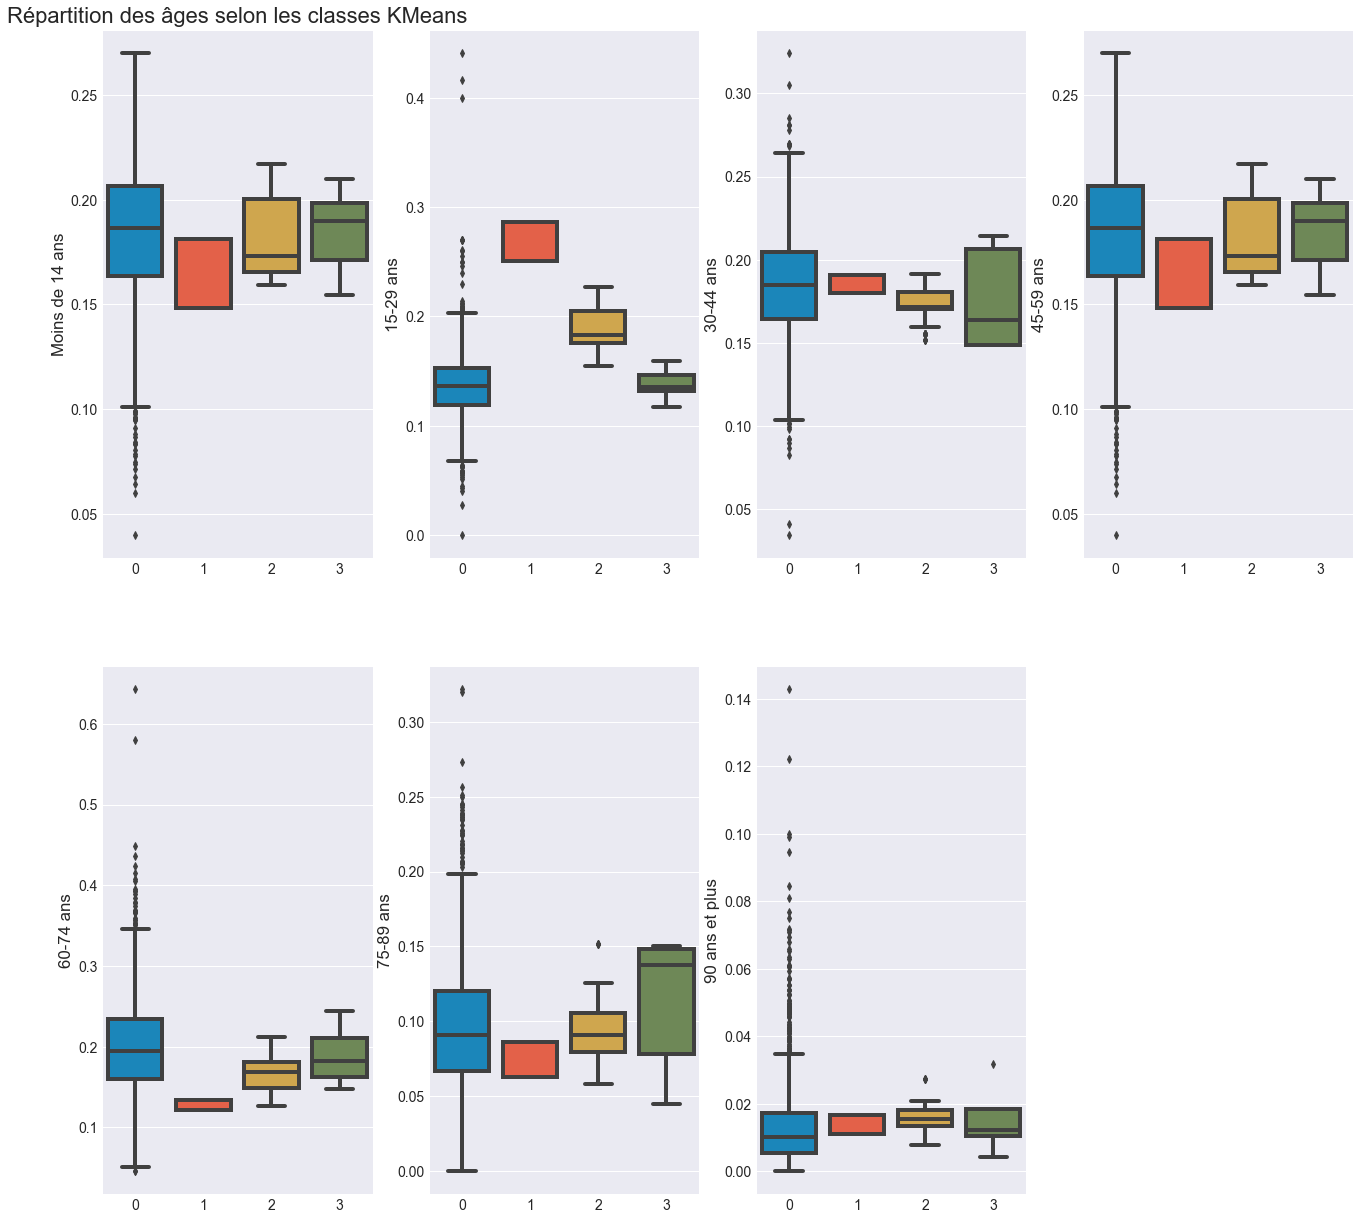

In [54]:
sns.set_style("darkgrid")

plt.figure(figsize=(20,20))

    
plt.subplot(2,4,1)
plt.title('Répartition des âges selon les classes KMeans', fontsize=22)
sns.boxplot(x='classe',y=x['X0.14_ans']/x['nb_pers'], data=x)
plt.ylabel('Moins de 14 ans')
plt.xlabel('')


plt.subplot(2,4,2)
sns.boxplot(x='classe',y=x['X15.29.ans']/x['nb_pers'], data=x)
plt.ylabel('15-29 ans')
plt.xlabel('')

plt.subplot(2,4,3)
sns.boxplot(x='classe',y=x['X30.44.ans']/x['nb_pers'], data=x)
plt.ylabel('30-44 ans')
plt.xlabel('')

plt.subplot(2,4,4)
sns.boxplot(x='classe',y=x['X45.59.ans']/x['nb_pers'], data=x)
plt.ylabel('45-59 ans')
plt.xlabel('')


plt.subplot(2,4,5)
sns.boxplot(x='classe',y=x['X60.74.ans']/x['nb_pers'], data=x)
plt.ylabel('60-74 ans')
plt.xlabel('')


plt.subplot(2,4,6)
sns.boxplot(x='classe',y=x['X75.89.ans']/x['nb_pers'], data=x)
plt.ylabel('75-89 ans')
plt.xlabel('')


plt.subplot(2,4,7)
sns.boxplot(x='classe',y=x['X90.ans.ou.plus']/x['nb_pers'], data=x)
plt.ylabel('90 ans et plus')
plt.xlabel('')

##### Répartition des CSP

Text(0.5, 0, '')

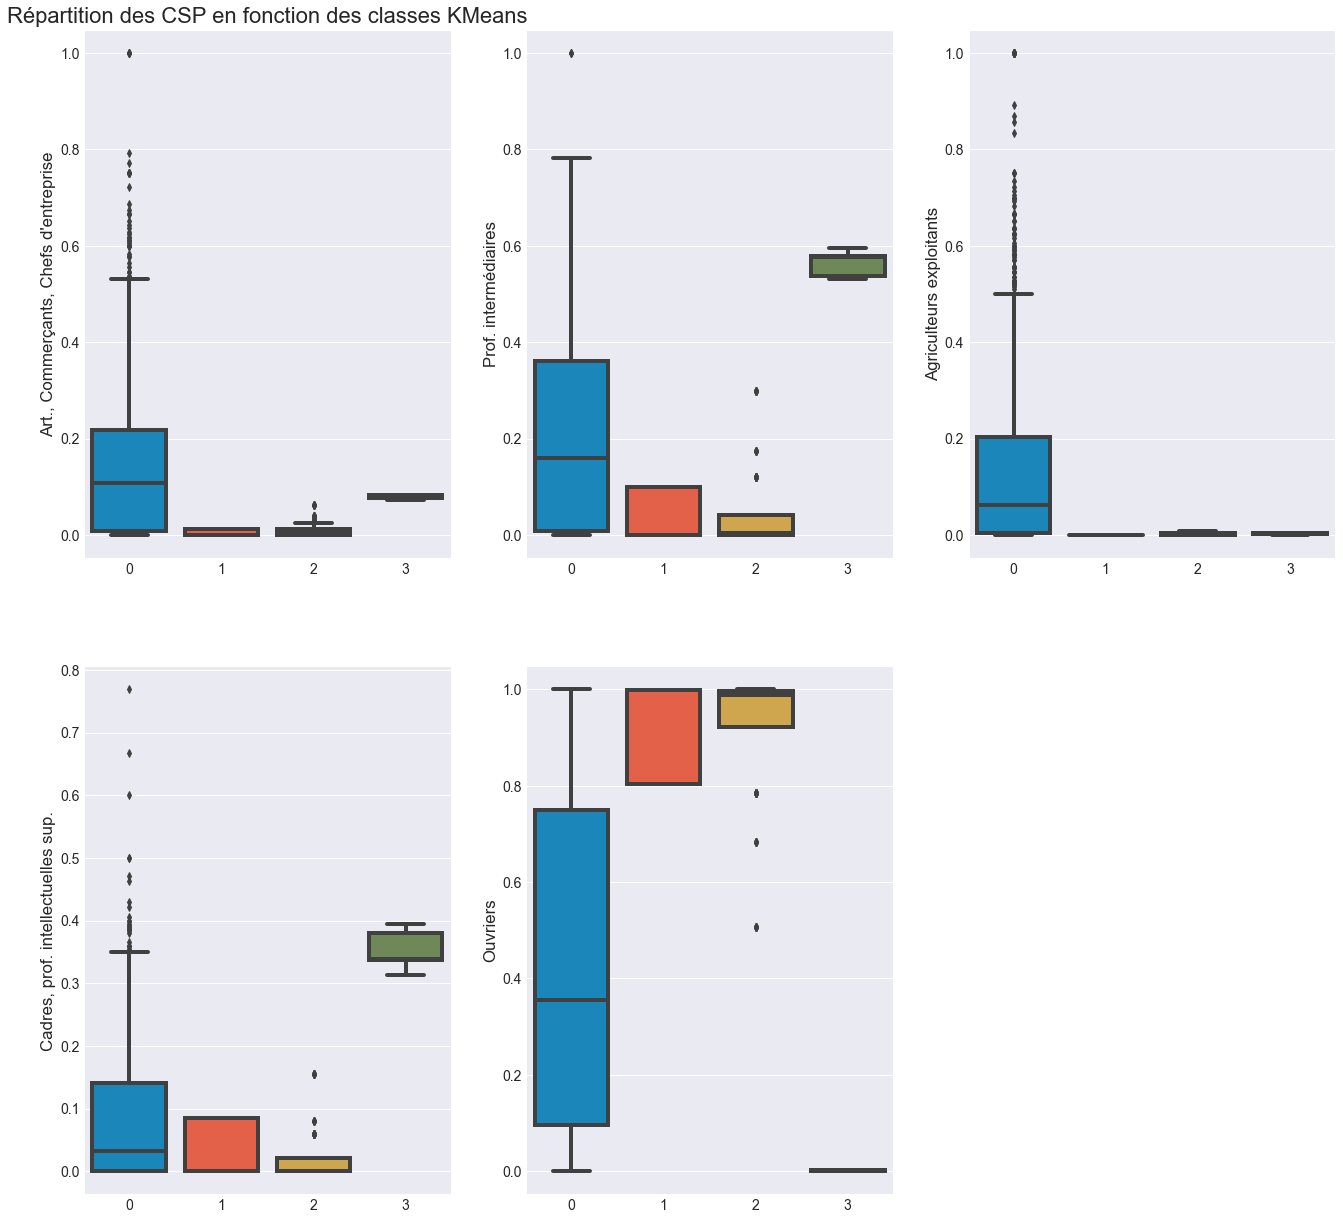

In [56]:
plt.figure(figsize=(20,20))


    
plt.subplot(2,3,1)
plt.title('Répartition des CSP en fonction des classes KMeans', fontsize=22)
sns.boxplot(x='classe',y=x['Artisans..Commercants..Chefs.entreprise']/(x['Artisans..Commercants..Chefs.entreprise']+x['Ouvriers']+x['Cadres.Prof..intel..sup.']+x['Agriculteurs.exploitants']+x['Prof..intermeiaires']), data=x)
plt.ylabel("Art., Commerçants, Chefs d'entreprise")
plt.xlabel('')


plt.subplot(2,3,2)
sns.boxplot(x='classe',y=x['Prof..intermeiaires']/(x['Artisans..Commercants..Chefs.entreprise']+x['Ouvriers']+x['Cadres.Prof..intel..sup.']+x['Agriculteurs.exploitants']+x['Prof..intermeiaires']), data=x)
plt.ylabel('Prof. intermédiaires')
plt.xlabel('')

plt.subplot(2,3,3)
sns.boxplot(x='classe',y=x['Agriculteurs.exploitants']/(x['Artisans..Commercants..Chefs.entreprise']+x['Ouvriers']+x['Cadres.Prof..intel..sup.']+x['Agriculteurs.exploitants']+x['Prof..intermeiaires']), data=x)
plt.ylabel('Agriculteurs exploitants')
plt.xlabel('')

plt.subplot(2,3,4)
sns.boxplot(x='classe',y=x['Cadres.Prof..intel..sup.']/(x['Artisans..Commercants..Chefs.entreprise']+x['Ouvriers']+x['Cadres.Prof..intel..sup.']+x['Agriculteurs.exploitants']+x['Prof..intermeiaires']), data=x)
plt.ylabel('Cadres, prof. intellectuelles sup.')
plt.xlabel('')


plt.subplot(2,3,5)
sns.boxplot(x='classe',y=x['Ouvriers']/(x['Artisans..Commercants..Chefs.entreprise']+x['Ouvriers']+x['Cadres.Prof..intel..sup.']+x['Agriculteurs.exploitants']+x['Prof..intermeiaires']), data=x)
plt.ylabel('Ouvriers')
plt.xlabel('')

##### Répartition des niveaux d'étude

Text(0.5, 0, '')

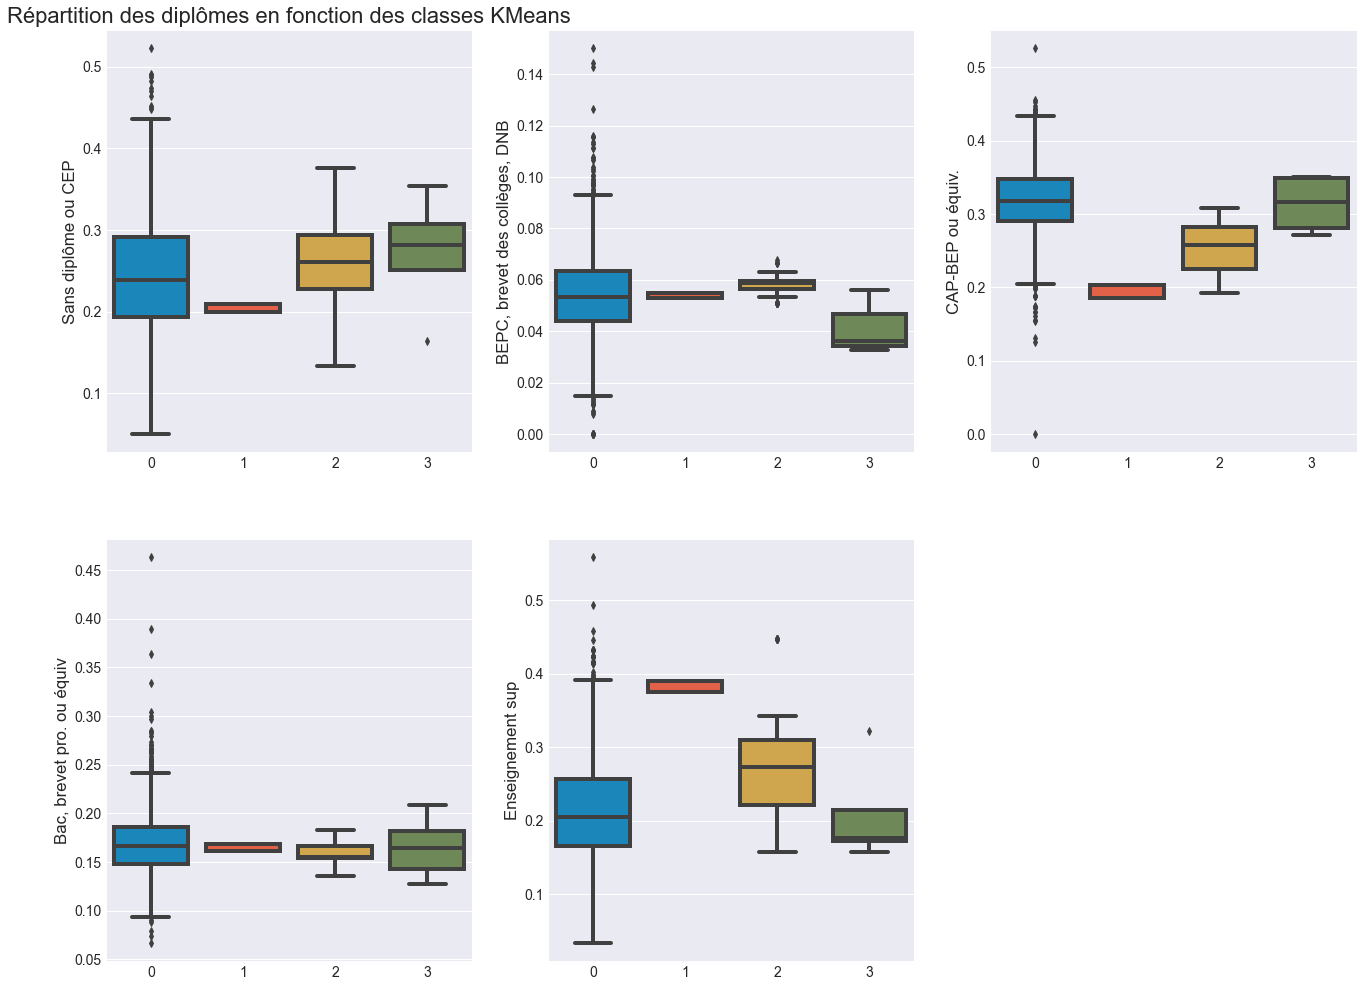

In [57]:

plt.figure(figsize=(20,16))

    
plt.subplot(2,3,1)
plt.title('Répartition des diplômes en fonction des classes KMeans', fontsize=22)
sns.boxplot(x='classe',y=x['Sans diplôme ou CEP']/(x['Sans diplôme ou CEP']+x['BEPC, brevet des collèges, DNB']+x['CAP-BEP ou équiv.']+x['Bac, brevet pro. ou équiv.']+x['Enseignement sup']), data=x)
plt.ylabel("Sans diplôme ou CEP")
plt.xlabel('')


plt.subplot(2,3,2)
sns.boxplot(x='classe',y=x['BEPC, brevet des collèges, DNB']/(x['Sans diplôme ou CEP']+x['BEPC, brevet des collèges, DNB']+x['CAP-BEP ou équiv.']+x['Bac, brevet pro. ou équiv.']+x['Enseignement sup']), data=x)
plt.ylabel('BEPC, brevet des collèges, DNB')
plt.xlabel('')

plt.subplot(2,3,3)
sns.boxplot(x='classe',y=x['CAP-BEP ou équiv.']/(x['Sans diplôme ou CEP']+x['BEPC, brevet des collèges, DNB']+x['CAP-BEP ou équiv.']+x['Bac, brevet pro. ou équiv.']+x['Enseignement sup']), data=x)
plt.ylabel('CAP-BEP ou équiv.')
plt.xlabel('')

plt.subplot(2,3,4)
sns.boxplot(x='classe',y=x['Bac, brevet pro. ou équiv.']/(x['Sans diplôme ou CEP']+x['BEPC, brevet des collèges, DNB']+x['CAP-BEP ou équiv.']+x['Bac, brevet pro. ou équiv.']+x['Enseignement sup']), data=x)
plt.ylabel('Bac, brevet pro. ou équiv')
plt.xlabel('')

        
plt.subplot(2,3,5)
sns.boxplot(x='classe',y=x['Enseignement sup']/(x['Sans diplôme ou CEP']+x['BEPC, brevet des collèges, DNB']+x['CAP-BEP ou équiv.']+x['Bac, brevet pro. ou équiv.']+x['Enseignement sup']), data=x)
plt.ylabel('Enseignement sup')
plt.xlabel('')



##### Connexion fibrée selon le type d'iris 

Text(0, 0.5, 'Proportion de fibre')

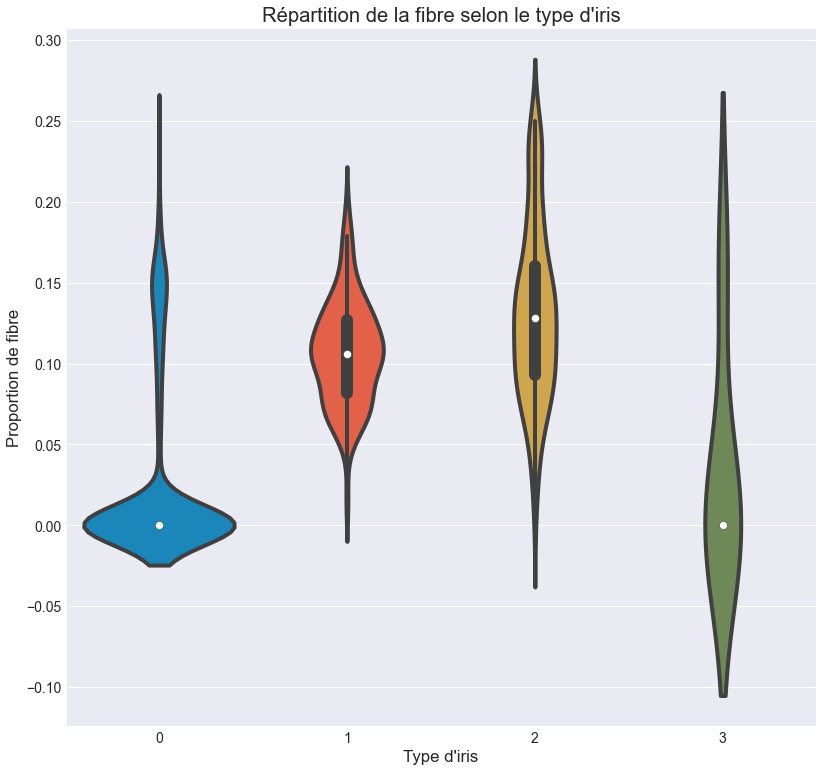

In [64]:
plt.figure(figsize=(12,12))

sns.violinplot(x='classe',y='code_techno', data=x)
plt.title("Répartition de la fibre selon le type d'iris")
plt.xlabel("Type d'iris")
plt.ylabel('Proportion de fibre')